# Prediksi Produktivitas Buruh Pada Perusahaan Pakaian

Pada industri garment atau clothing, efisiensi dan produktivitas karyawan menjadi aspek penting dalam menjaga kualitas dan memenuhi permintaan pasar yang fluktuatif. Sebagian besar aktivitas di perusahaan garment masih dilakukan secara manual, membuat pemantauan kinerja dan pemberian insentif menjadi proses yang cukup rumit. Pendekatan tradisional ini dapat menyulitkan manajemen dalam mendeteksi penurunan kinerja secara dini serta mengidentifikasi tim-tim dengan performa baik yang layak mendapat insentif. Di sinilah model prediksi produktivitas dapat berperan untuk mempermudah pengambilan keputusan.

Penerapan machine learning dalam memprediksi produktivitas aktual karyawan memungkinkan perusahaan untuk meningkatkan efisiensi operasional, mempercepat proses pengambilan keputusan, dan memberikan intervensi atau reward yang tepat waktu. Riset menunjukkan bahwa model prediksi yang akurat dapat membantu perusahaan garment mencapai target produktivitas serta mengurangi biaya yang muncul akibat keterlambatan atau penurunan kinerja (Sabuj et al, 2022). Model ini dapat membantu perusahaan untuk tetap kompetitif di tengah tekanan industri yang membutuhkan respon cepat dan kinerja yang konsisten.

Sabuj, H., Nuha, N., Gomes, P., Lameesa, A., & Alam, M. (2022). Interpretable Garment Workers’ Productivity Prediction in Bangladesh Using Machine Learning Algorithms and Explainable AI. 2022 25th International Conference on Computer and Information Technology (ICCIT), 236-241. https://doi.org/10.1109/ICCIT57492.2022.10054863.

## Business Understanding

#### Problem Statements
- Bagaimana cara memprediksi produktivitas karyawan secara efektif agar perusahaan dapat melakukan intervensi atau pemberian insentif dengan tepat waktu?
- Bagaimana perusahaan dapat mengidentifikasi faktor-faktor yang berdampak pada produktivitas karyawan untuk mengoptimalkan alokasi tugas?

#### Goals
- Mengembangkan model prediksi produktivitas karyawan yang dapat memperkirakan produktivitas secara akurat berdasarkan data historis, sehingga intervensi dan pemberian insentif dapat dilakukan secara efektif.
- Mengidentifikasi faktor-faktor yang berpengaruh terhadap produktivitas, seperti target harian, idle time, lembur, dan insentif, untuk membantu pengelolaan sumber daya manusia yang lebih efisien.

#### Solution Statements
- Model prediksi akan menggunakan algoritma Regresi seperti Random Forest dan Linear Regression, dengan pemilihan model terbaik berdasarkan performa metrik evaluasi (MAE, MSE, RMSE, dan SMAPE).
- Melakukan pengoptimalan model dengan analisis faktor eksternal dan membandingkan hasil produktivitas antara tim yang memiliki target tinggi dengan tim yang cenderung sering mengalami perubahan desain. Model yang paling sesuai akan dievaluasi untuk memastikan ketepatan prediksi dalam skenario yang berbeda.

In [ ]:
!pip install catboost
!pip install pyforest
!pip install xgboost
!pip install lightgbm
!pip install imblearn
!pip install smogn

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import xgboost  as xgb
import lightgbm as lgb
import catboost as cat

In [ ]:
from sklearn.feature_selection     import RFE, SelectKBest
from sklearn.model_selection       import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.neural_network        import MLPRegressor
from sklearn.preprocessing         import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.linear_model          import LinearRegression
from sklearn.neighbors             import KNeighborsRegressor
from sklearn.ensemble              import RandomForestRegressor
from sklearn.metrics               import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree                  import DecisionTreeRegressor
from sklearn.svm                   import SVR
from scipy.stats                   import randint
from catboost                      import CatBoostRegressor
from pyforest                      import *

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from smogn import smoter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Understanding

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Kode/ML/DBS-Expert/garments_worker_productivity.csv')

In [ ]:
df[df['day'].isin(['Saturday', 'Tuesday'])]

date   quarter  department       day  team  targeted_productivity  \
19     1/3/2015  Quarter1  finishing   Saturday     4                   0.80   
20     1/3/2015  Quarter1  finishing   Saturday    11                   0.75   
21     1/3/2015  Quarter1  finishing   Saturday     9                   0.80   
22     1/3/2015  Quarter1  finishing   Saturday     3                   0.75   
23     1/3/2015  Quarter1  finishing   Saturday     1                   0.80   
...         ...       ...         ...       ...   ...                    ...   
1168  3/10/2015  Quarter2      sweing   Tuesday     5                   0.65   
1169  3/10/2015  Quarter2      sweing   Tuesday     7                   0.60   
1170  3/10/2015  Quarter2   finishing   Tuesday     8                   0.65   
1171  3/10/2015  Quarter2   finishing   Tuesday     7                   0.50   
1172  3/10/2015  Quarter2   finishing   Tuesday    10                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
19     4.15     NaN       6600          0        0.0         0   
20     2.90     NaN       5640          0        0.0         0   
21     4.15     NaN        960          0        0.0         0   
22     3.94     NaN       1560          0        0.0         0   
23     3.94     NaN        960          0        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1168  26.82  1001.0       7080         26        0.0         0   
1169  30.48  1017.0       6840         25        0.0         0   
1170   3.90     NaN        960          0        0.0         0   
1171   3.90     NaN        960          0        0.0         0   
1172   2.90     NaN        960          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  
19                     0           20.0             0.988025  
20                     0           17.0             0.987880  
21                     0            8.0             0.956271  
22                     0            8.0             0.945278  
23                     0            8.0             0.902917  
...                  ...            ...                  ...  
1168                   1           59.0             0.650044  
1169                   1           57.0             0.630403  
1170                   0            8.0             0.560625  
1171                   0            8.0             0.560625  
1172                   0            8.0             0.398750  

[388 rows x 15 columns]

In [ ]:
df['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

#### Struktur Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

#### Dimensi data

In [ ]:
df.shape

(1197, 15)

1197 record data serta 15 variabel

#### Missing value

In [ ]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

date   quarter  department        day  team  targeted_productivity  \
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
6      1/1/2015  Quarter1  finishing    Thursday     2                   0.75   
13     1/1/2015  Quarter1  finishing    Thursday    10                   0.65   
14     1/1/2015  Quarter1  finishing    Thursday     8                   0.75   
15     1/1/2015  Quarter1  finishing    Thursday     4                   0.75   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.70   

       smv  wip  over_time  incentive  idle_time  idle_men  \
1     3.94  NaN        960          0        0.0         0   
6     3.94  NaN        960          0        0.0         0   
13    3.94  NaN        960          0        0.0         0   
14    2.90  NaN        960          0        0.0         0   
15    3.94  NaN       2160          0        0.0         0   
...    ...  ...        ...        ...        ...       ...   
1192  2.90  NaN        960          0        0.0         0   
1193  3.90  NaN        960          0        0.0         0   
1194  3.90  NaN        960          0        0.0         0   
1195  2.90  NaN       1800          0        0.0         0   
1196  2.90  NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  
1                      0            8.0             0.886500  
6                      0            8.0             0.755167  
13                     0            8.0             0.705917  
14                     0            8.0             0.676667  
15                     0           18.0             0.593056  
...                  ...            ...                  ...  
1192                   0            8.0             0.628333  
1193                   0            8.0             0.625625  
1194                   0            8.0             0.625625  
1195                   0           15.0             0.505889  
1196                   0            6.0             0.394722  

[506 rows x 15 columns]

In [ ]:
df.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

Solusi untuk 500 record data yang mengalami missing value tersebut tidak bisa aku isi dengan 0 atau menghapus kolomnya, karena 50% data mengalami missing value. Solusinya mungkin bisa diisi dengan mean atau rata-rata.

In [ ]:
df['wip'].fillna(df['wip'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
df

date   quarter  department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.70   

        smv          wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.000000       7080         98        0.0         0   
1      3.94  1190.465991        960          0        0.0         0   
2     11.41   968.000000       3660         50        0.0         0   
3     11.41   968.000000       3660         50        0.0         0   
4     25.90  1170.000000       1920         50        0.0         0   
...     ...          ...        ...        ...        ...       ...   
1192   2.90  1190.465991        960          0        0.0         0   
1193   3.90  1190.465991        960          0        0.0         0   
1194   3.90  1190.465991        960          0        0.0         0   
1195   2.90  1190.465991       1800          0        0.0         0   
1196   2.90  1190.465991        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  
0                      0           59.0             0.940725  
1                      0            8.0             0.886500  
2                      0           30.5             0.800570  
3                      0           30.5             0.800570  
4                      0           56.0             0.800382  
...                  ...            ...                  ...  
1192                   0            8.0             0.628333  
1193                   0            8.0             0.625625  
1194                   0            8.0             0.625625  
1195                   0           15.0             0.505889  
1196                   0            6.0             0.394722  

[1197 rows x 15 columns]

In [ ]:
df['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

In [ ]:
df['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [ ]:
df['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [ ]:
df['no_of_style_change'].value_counts()

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64

In [ ]:
df['idle_men'].value_counts()

idle_men
0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: count, dtype: int64

In [ ]:
df['idle_time'].value_counts()

idle_time
0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: count, dtype: int64

Variabel-variabel kategorikal diatas nantinya akan diterapkan encoding:
- `day`: tidak memiliki urutan maka One-Hot Encoding akan cocok.
- `quarter`: memiliki urutan atau tingkatan (Quarter1, Quarter2, dll.) mungkin ordinal Encoding bisa digunakan.
- `department`: label encoding karena jika diterapkan onehot akan terlalu banyak fitur

In [ ]:
df2 = df.drop(['date'], axis=1)

In [ ]:
df2.head(5)

quarter  department       day  team  targeted_productivity    smv  \
0  Quarter1      sweing  Thursday     8                   0.80  26.16   
1  Quarter1  finishing   Thursday     1                   0.75   3.94   
2  Quarter1      sweing  Thursday    11                   0.80  11.41   
3  Quarter1      sweing  Thursday    12                   0.80  11.41   
4  Quarter1      sweing  Thursday     6                   0.80  25.90   

           wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
0  1108.000000       7080         98        0.0         0                   0   
1  1190.465991        960          0        0.0         0                   0   
2   968.000000       3660         50        0.0         0                   0   
3   968.000000       3660         50        0.0         0                   0   
4  1170.000000       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity  
0           59.0             0.940725  
1            8.0             0.886500  
2           30.5             0.800570  
3           30.5             0.800570  
4           56.0             0.800382

In [ ]:
df2.shape

(1197, 14)

#### Exploratory Data Analysis

### Outlier
![image.png](attachment:image.png)

#### menentukan variabel yang kategorikal dan numerik

In [ ]:
objek_vars           = []
numerik_vars         = []

for col in df2.columns:

    if df2[col].dtype == 'object':
        objek_vars.append(col)

    else:
        numerik_vars.append(col)

#### membuat visualisasi boxplot untuk melihat outlier dan mengantisipasi variasi data yang tinggi

In [ ]:
df3                = df2.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

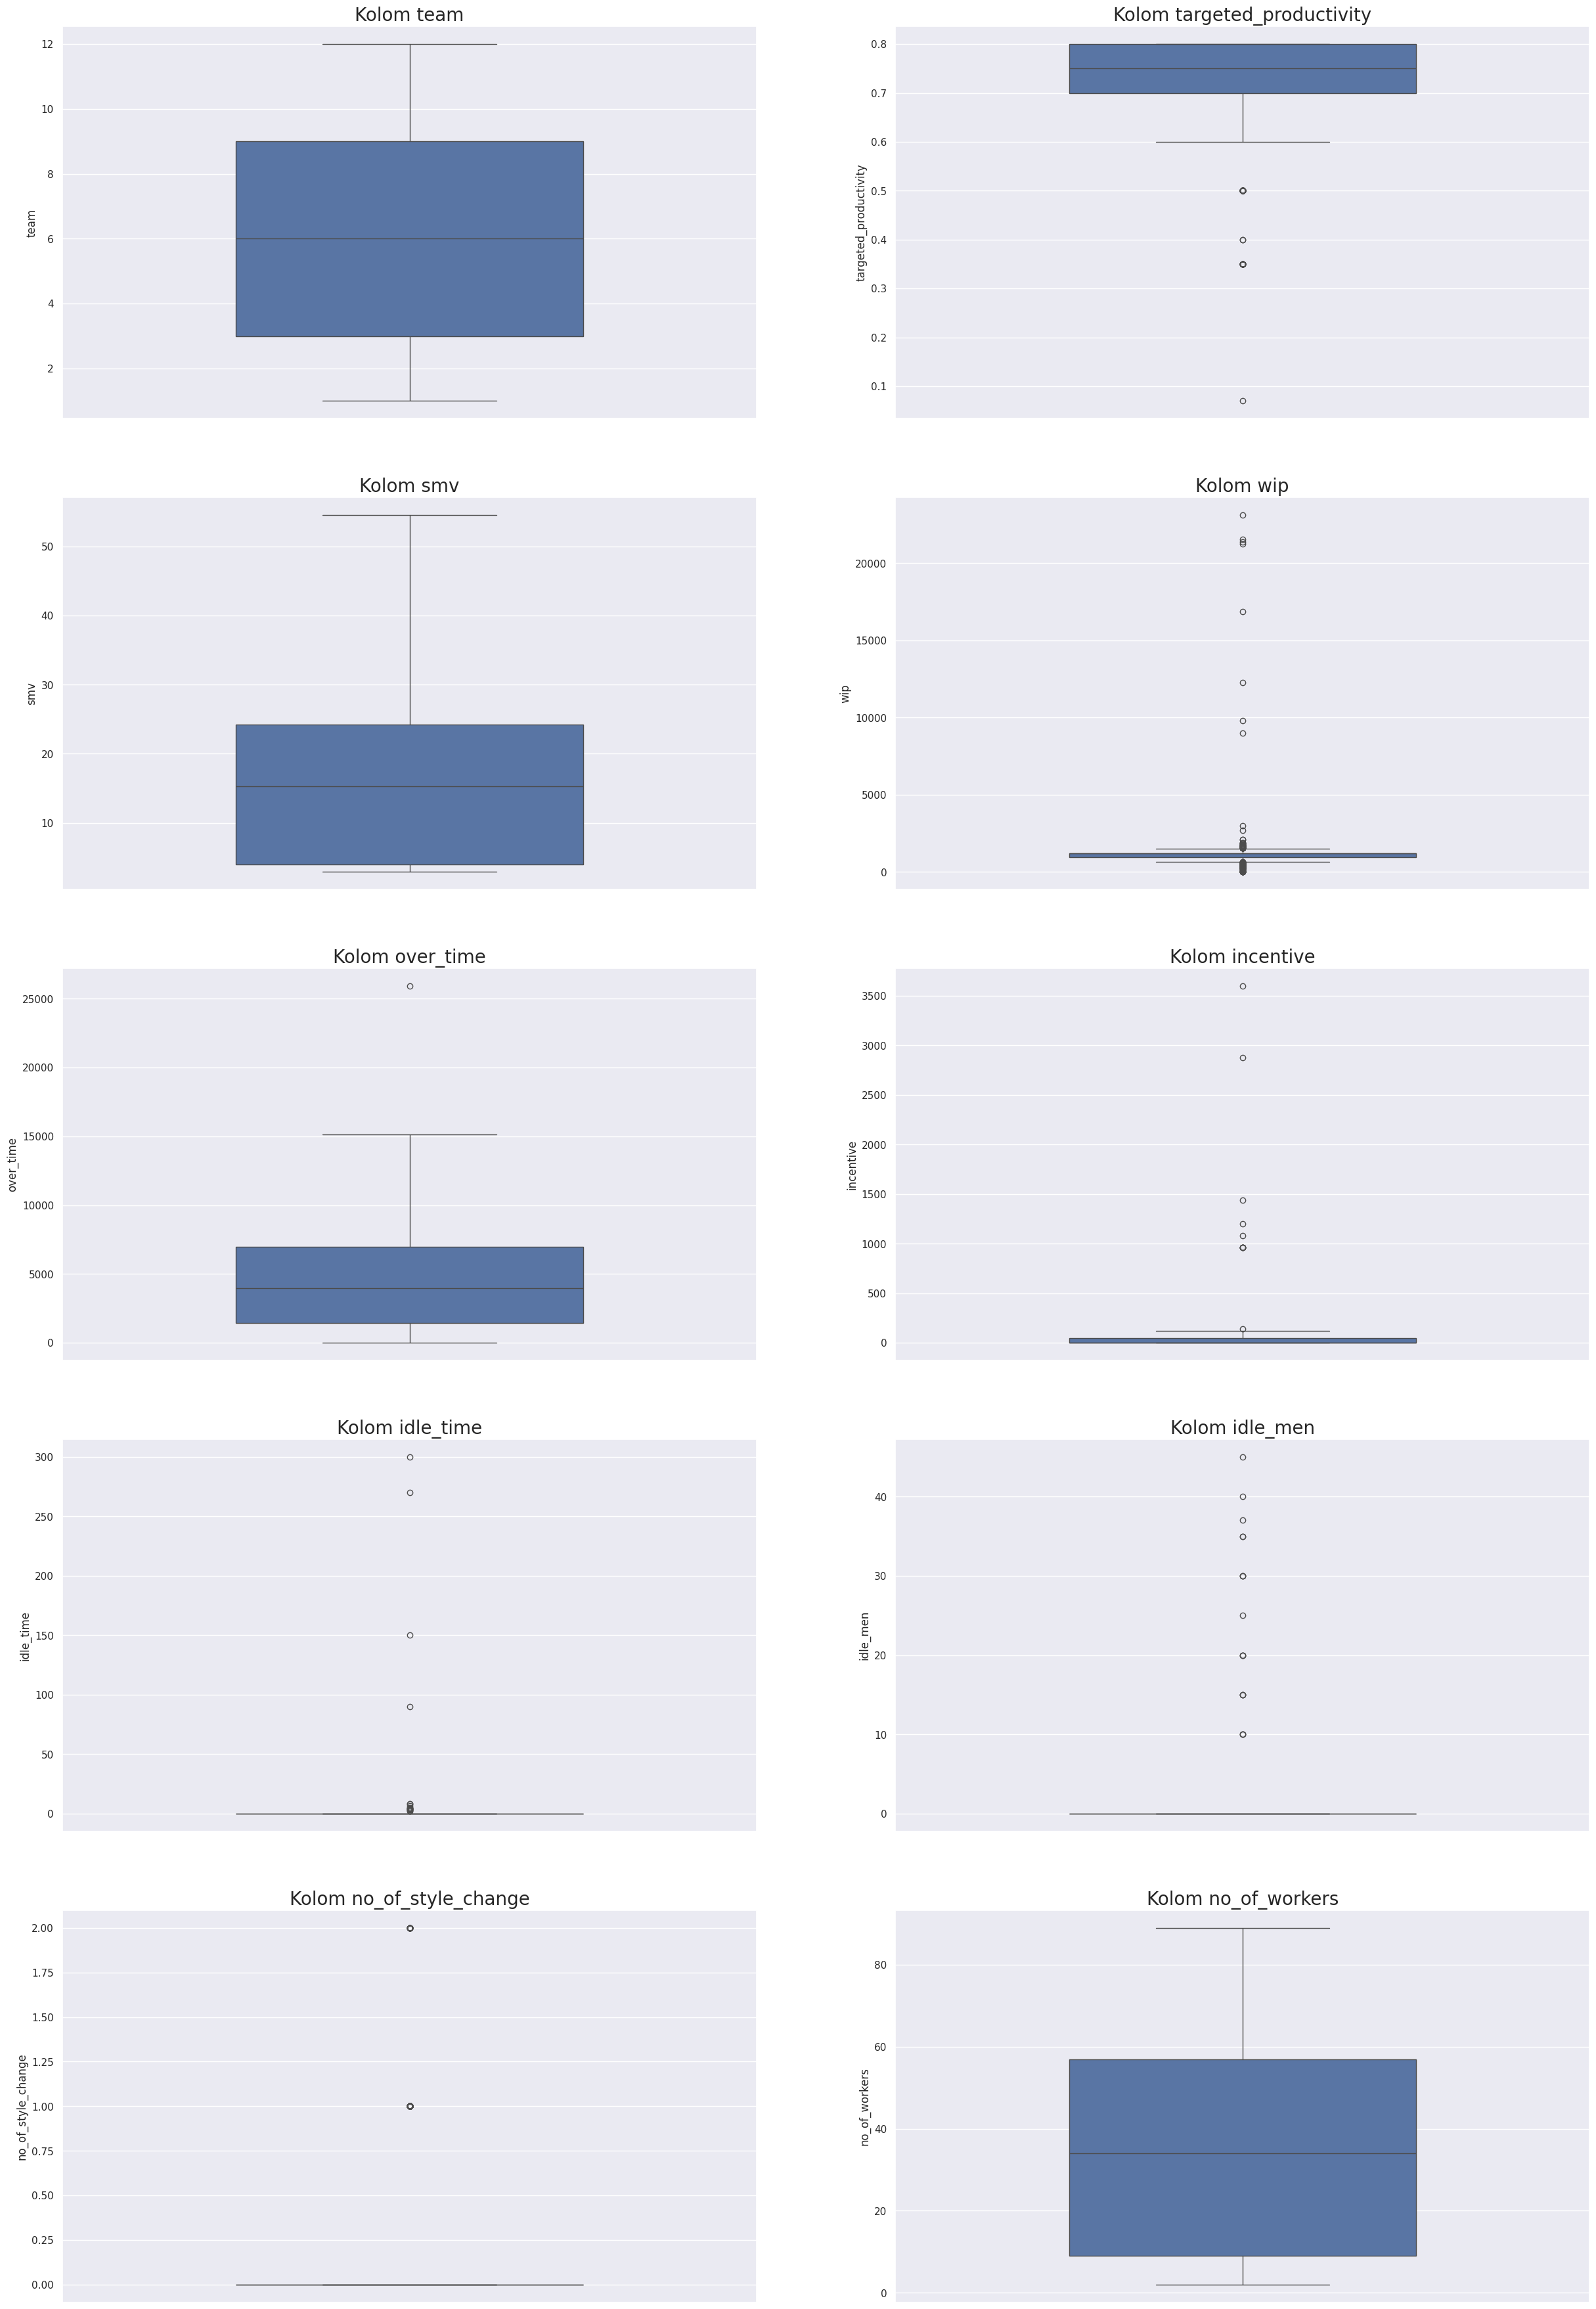

In [ ]:
num                = df3[numerik_vars]
n                  = len(num.columns)
rows               = n // 2
cols               = 2
sns.set(font_scale = 1)
fig, ax            = plt.subplots(rows, cols, figsize=(30, 45))

for i in range(rows):

    for j in range(cols):

        index      = i * cols + j
        if index   < n:
            col    = num.columns[index]
            sns.boxplot(ax=ax[i, j],
                        data=num,
                        y=num[col],
                        width=0.50)

            ax[i, j].set_title(f'Kolom {col}', fontdict={'fontsize': 20})

In [ ]:
df3.shape

(1197, 14)

### Handling Outlier
Variabel yang merupakan outlier dan harus dihandle:
- target_productivity
- incentive
- wip
- over_time

In [ ]:
def handle_outlier(df, variabel):
    Q1          = df[variabel].quantile(0.25)
    Q3          = df[variabel].quantile(0.75)
    IQR         = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df.loc[df[variabel] > upper_limit, variabel] = upper_limit
    df.loc[df[variabel] < lower_limit, variabel] = lower_limit

    return df

Mengganti nilai-nilai yang dianggap outlier atau nilai yang lebih dari lower limit dan kurang dari upper limit.

In [ ]:
variabel_outlir = ['targeted_productivity',
                   'incentive',
                   'wip',
                   'over_time']

In [ ]:
for var in variabel_outlir:
    df3  = handle_outlier(df3, var)

In [ ]:
df3.shape

(1197, 14)

#### Recheck outlier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

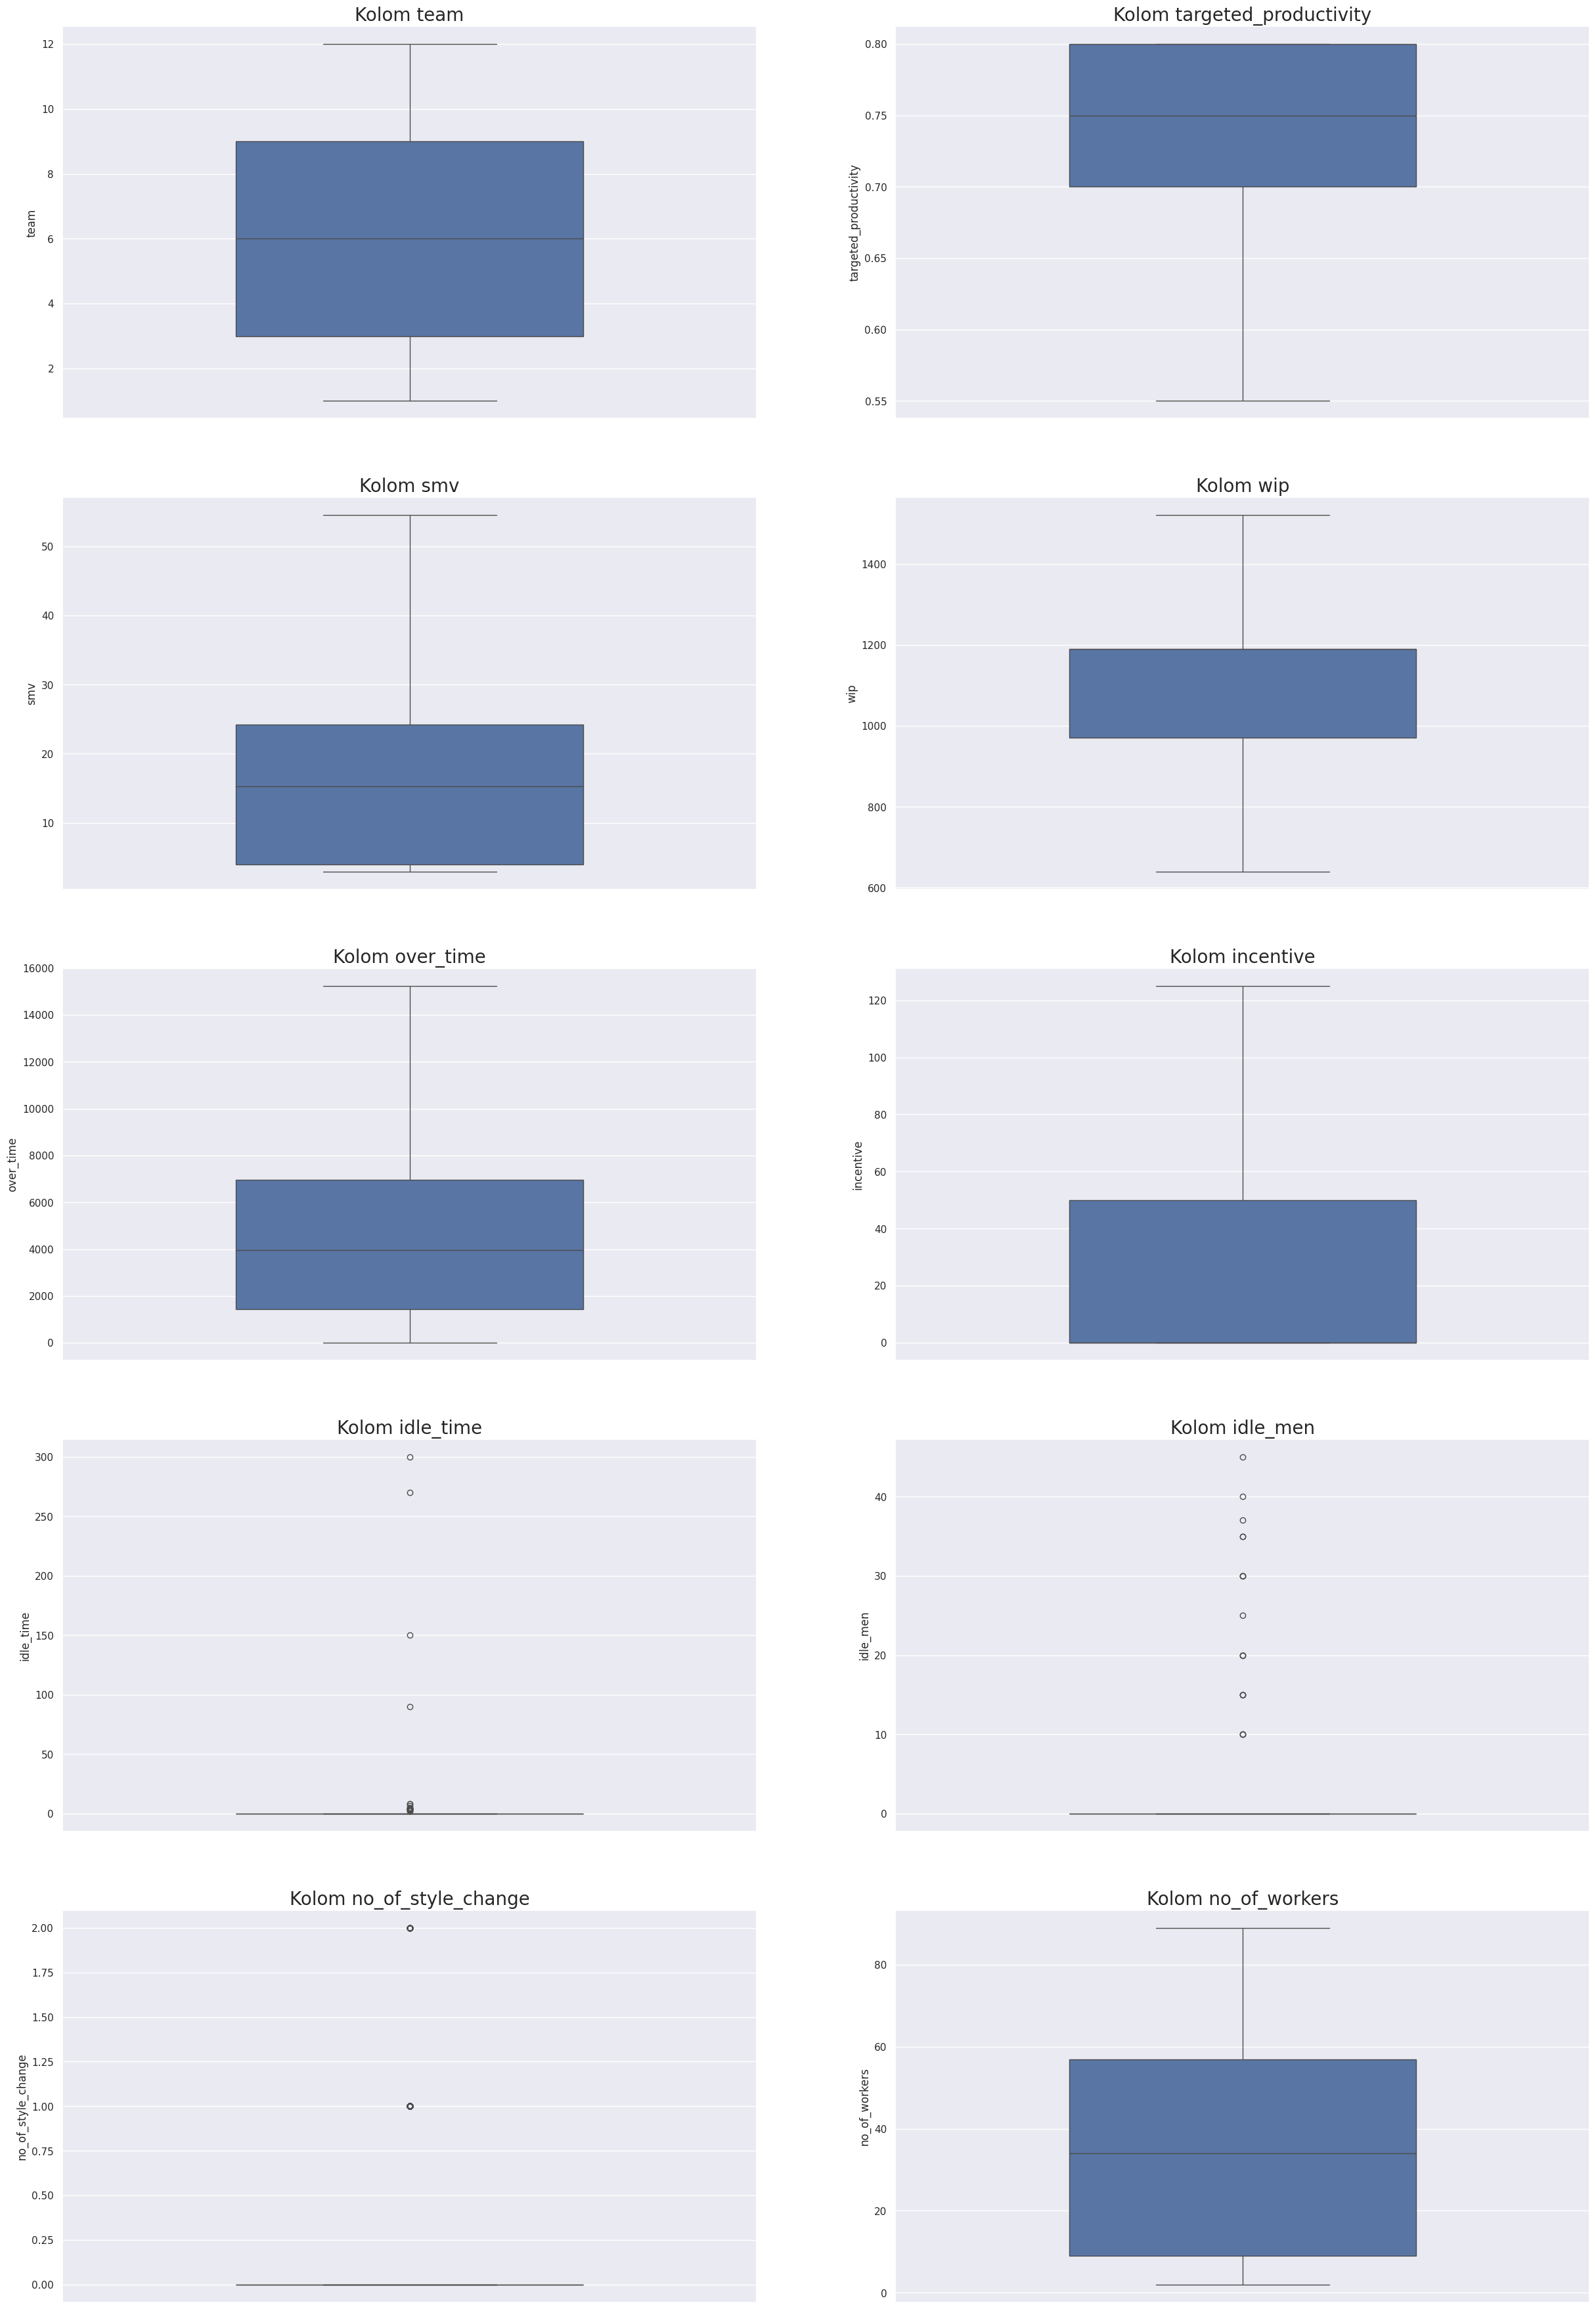

In [ ]:
num                = df3[numerik_vars]
n                  = len(num.columns)
rows               = n // 2
cols               = 2
sns.set(font_scale = 1)
fig, ax            = plt.subplots(rows, cols, figsize=(30, 45))

for i in range(rows):

    for j in range(cols):

        index      = i * cols + j
        if index   < n:
            col    = num.columns[index]
            sns.boxplot(ax=ax[i, j],
                        data=num,
                        y=num[col],
                        width=0.50)

            ax[i, j].set_title(f'Kolom {col}', fontdict={'fontsize': 20})

In [ ]:
df3.shape

(1197, 14)

### Imbalance Case terhadap variabel target

In [ ]:
df3['actual_productivity'].value_counts()

actual_productivity
0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: count, Length: 879, dtype: int64

In [ ]:
df3['actual_productivity'].unique()

array([0.94072542, 0.8865    , 0.80057049, 0.80038194, 0.800125  ,
       0.75516667, 0.75368348, 0.75309753, 0.75042783, 0.72112696,
       0.71220525, 0.7070459 , 0.70591667, 0.67666667, 0.59305556,
       0.54072917, 0.52118   , 0.43632639, 0.98802469, 0.98788044,
       0.95627083, 0.94527778, 0.90291667, 0.80072531, 0.80032294,
       0.80031864, 0.80023729, 0.80014865, 0.78729969, 0.78244792,
       0.75024303, 0.7018125 , 0.70013404, 0.69996522, 0.62833333,
       0.6253125 , 0.99138889, 0.93164583, 0.91522917, 0.87971448,
       0.86167901, 0.85056949, 0.85043644, 0.85034513, 0.80059806,
       0.80023784, 0.8000302 , 0.79210417, 0.75922839, 0.75034846,
       0.68270833, 0.66760417, 0.60343218, 0.34583333, 0.96105903,
       0.93951389, 0.89366319, 0.87539062, 0.82083333, 0.80441667,
       0.80068437, 0.80025096, 0.80024601, 0.80007652, 0.763375  ,
       0.75927083, 0.7504    , 0.66458333, 0.60002874, 0.96678135,
       0.93649621, 0.89916667, 0.88868687, 0.85814394, 0.85050

Variabel target merupakan variabel kontinyu sehingga akan sangat cocok untuk diterapkan regresi yaitu tugas prediksi.

### Exploratory Data Analysis
#### Analisis Univariate
Melakukan analisis satu variabel independen mengenai pengaruhnya terhadap satu variabel dependen. Sehingga dapat mengetahui korelasi atau hubungannya dari kedua variabel tersebut.

In [ ]:
df2.head(5)

quarter  department       day  team  targeted_productivity    smv  \
0  Quarter1      sweing  Thursday     8                   0.80  26.16   
1  Quarter1  finishing   Thursday     1                   0.75   3.94   
2  Quarter1      sweing  Thursday    11                   0.80  11.41   
3  Quarter1      sweing  Thursday    12                   0.80  11.41   
4  Quarter1      sweing  Thursday     6                   0.80  25.90   

           wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
0  1108.000000       7080         98        0.0         0                   0   
1  1190.465991        960          0        0.0         0                   0   
2   968.000000       3660         50        0.0         0                   0   
3   968.000000       3660         50        0.0         0                   0   
4  1170.000000       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity  
0           59.0             0.940725  
1            8.0             0.886500  
2           30.5             0.800570  
3           30.5             0.800570  
4           56.0             0.800382

In [ ]:
objek_vars

['quarter', 'department', 'day']

In [ ]:
numerik_vars2 = [
                 'targeted_productivity',
                 'smv',
                 'wip',
                 'over_time',
                 'incentive',
                 'idle_time',
                 'idle_men',
                 'no_of_style_change',
                 'no_of_workers']

In [ ]:
df3

quarter  department        day  team  targeted_productivity    smv  \
0     Quarter1      sweing   Thursday     8                   0.80  26.16   
1     Quarter1  finishing    Thursday     1                   0.75   3.94   
2     Quarter1      sweing   Thursday    11                   0.80  11.41   
3     Quarter1      sweing   Thursday    12                   0.80  11.41   
4     Quarter1      sweing   Thursday     6                   0.80  25.90   
...        ...         ...        ...   ...                    ...    ...   
1192  Quarter2   finishing  Wednesday    10                   0.75   2.90   
1193  Quarter2   finishing  Wednesday     8                   0.70   3.90   
1194  Quarter2   finishing  Wednesday     7                   0.65   3.90   
1195  Quarter2   finishing  Wednesday     9                   0.75   2.90   
1196  Quarter2   finishing  Wednesday     6                   0.70   2.90   

              wip  over_time  incentive  idle_time  idle_men  \
0     1108.000000       7080         98        0.0         0   
1     1190.465991        960          0        0.0         0   
2      968.000000       3660         50        0.0         0   
3      968.000000       3660         50        0.0         0   
4     1170.000000       1920         50        0.0         0   
...           ...        ...        ...        ...       ...   
1192  1190.465991        960          0        0.0         0   
1193  1190.465991        960          0        0.0         0   
1194  1190.465991        960          0        0.0         0   
1195  1190.465991       1800          0        0.0         0   
1196  1190.465991        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  
0                      0           59.0             0.940725  
1                      0            8.0             0.886500  
2                      0           30.5             0.800570  
3                      0           30.5             0.800570  
4                      0           56.0             0.800382  
...                  ...            ...                  ...  
1192                   0            8.0             0.628333  
1193                   0            8.0             0.625625  
1194                   0            8.0             0.625625  
1195                   0           15.0             0.505889  
1196                   0            6.0             0.394722  

[1197 rows x 14 columns]

### EDA for Numerical Variabel/Fitur
- Variabel target `actual_productivity` kita jadikan sebagai variabel y atau vertikal pada visualisasi dibawah ini, dikarenakan variabel tersebut merupakan kontinyu.

In [ ]:
def scatter_plot(df, numerik_vars, target_var):
    num               = df[numerik_vars]
    n                 = len(num.columns)
    rows              = n // 2 + n % 2
    cols              = 2
    sns.set(font_scale=1)
    fig, ax           = plt.subplots(rows, cols, figsize=(20, rows * 5))

    for i in range(rows):

        for j in range(cols):
            index     = i * cols + j

            if index  < n:

                col   = num.columns[index]
                sns.scatterplot(ax=ax[i, j],
                                data=df,
                                x=col,
                                y=target_var)

                ax[i, j].set_title(f'Hubungan antara {col} terhadap actual_productivity', fontdict={'fontsize': 15})
                ax[i, j].set_xlabel(col)
                ax[i, j].set_ylabel('actual_productivity')

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

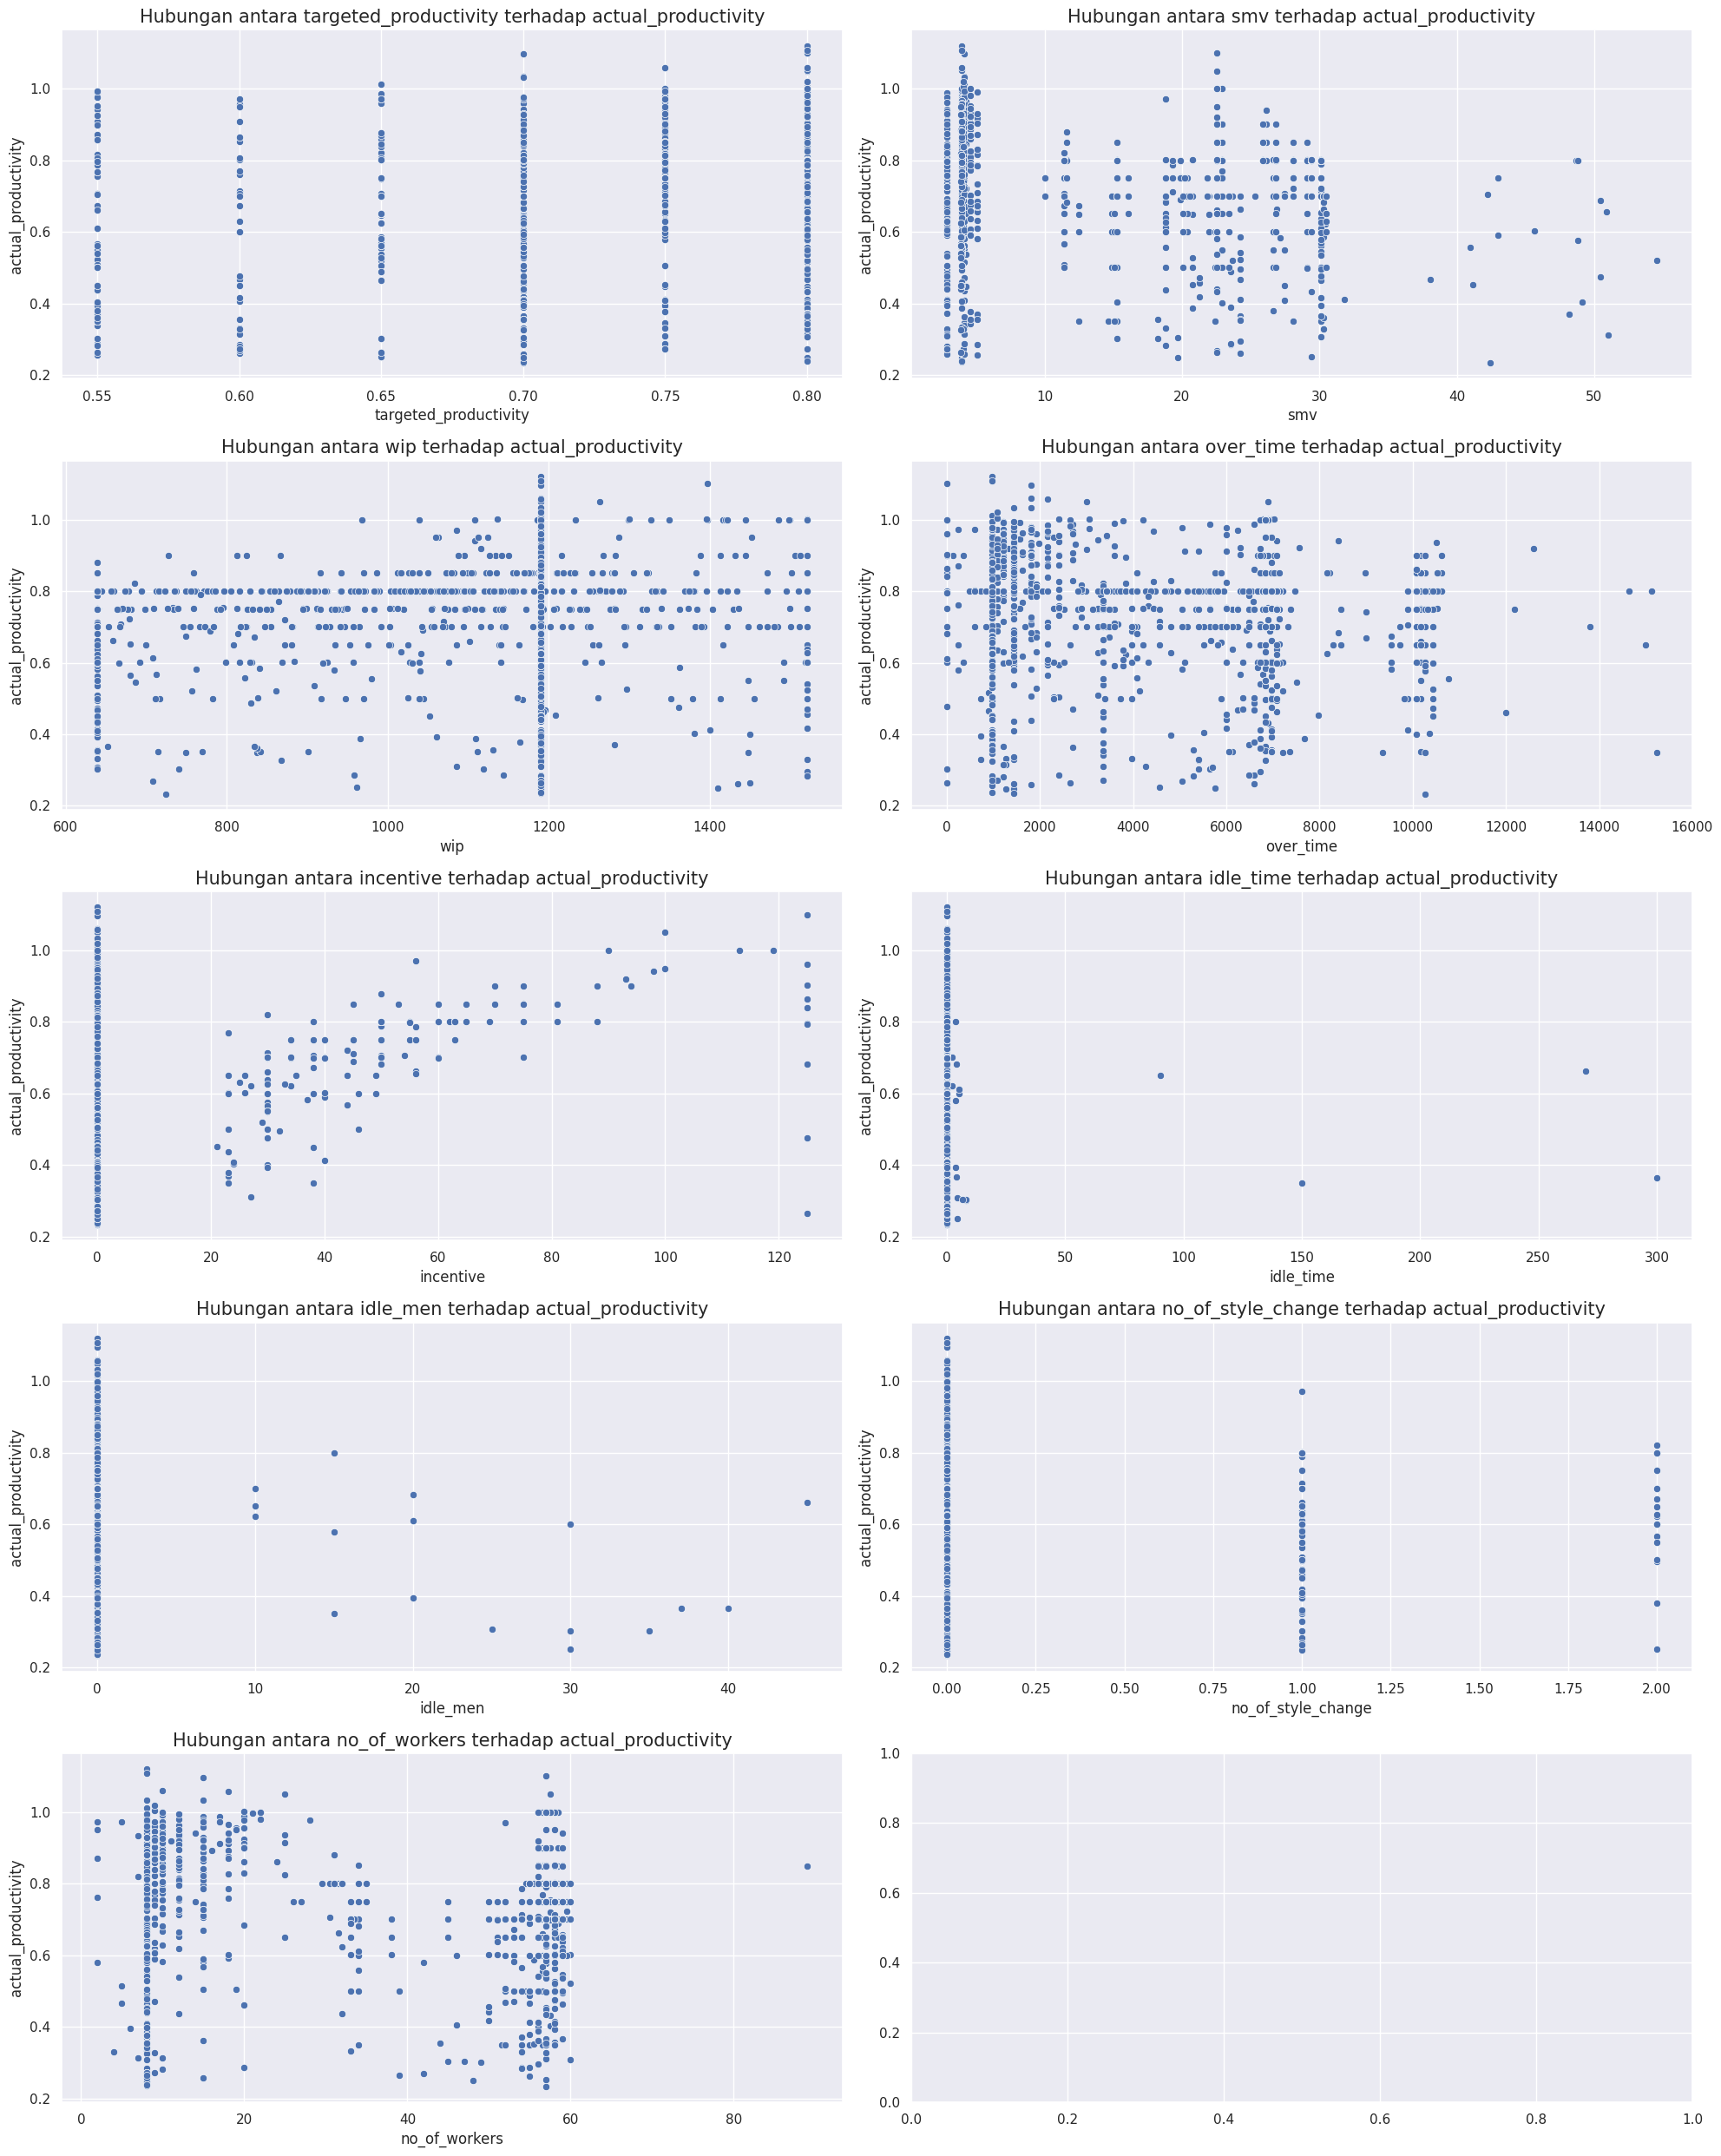

In [ ]:
scatter_plot(df3, numerik_vars2, 'actual_productivity')

- Persebaran data pada `targeted_productivity` memiliki persebaran paling padat pada nilai 0.80. Hal ini berarti ketika target produktivitas 0.88 itu cukup banyak dicapai oleh produktivitas aktual.
- `smv` itu mengenai banyaknya waktu yang dialokasikan untuk mengerjakan tugas. Data menunjukkan bahwa ketika smv pada rentang 0 - 10 memiliki persebaran produktivitas aktual yang padat sehingga memiliki banyak variasi pada rentang tersebut. Sedangkan ketika pada rentang smv > 35 itu tidak terlalu produktif.
- Data `wip` menunjukkan persebaran yang seragam baik ketika nilai `wip` kecil ataupun tinggi. `Wip` yang lebih tinggi tampaknya berkorelasi dengan sedikit peningkatan produktivitas aktual, tetapi hal ini tidak konsisten.
- Data `over_time` atau waktu lembur menunjukkan bahwa data cenderung beragam. Namun satu hal yang pasti bahwa ketika waktu lembur sedikit maka produktivitas aktual akan semakin tinggi.
- Data `incentive` tersebut memiliki hubungan positif terhadap `actual_productivity`. Karena semakin tinggi insentif yang diberikan, produktivitas aktual cenderung meningkat. Namun juga memiliki persebaran yang padat ketika incentive bernilai 0 (variasi banyak).
- Data `idle_men` juga memiliki persebaran data yang padat ketika 0 (variasi). Selain itu hubungan antara kedua variabel tersebut memiliki hubungan yang negatif. Ketika jumlah pekerja yang menganggur meningkat, produktivitas cenderung rendah dan tidak mencapai nilai maksimum.
- Data `no_of_workers` memiliki persebaran yang cukup beragam. Namun, terdapat banyak titik dengan produktivitas maksimum (1.0) pada berbagai jumlah pekerja, seperti contohnya pada rentang 0 - 20, namun rentang tersebut masih terlalu luas.
- Data `idle_time` memiliki persebaran data produktivitas aktual yang padat ketika bernilai 0. Sehingga tidak bisa melihat tren data yang ada.
- Begitupun dengan data `no_of_style_change` yang mungkin merupakan data kategorikal.

In [ ]:
def bar_plot(df, kategorik_vars, target_var):
    cat          = df[kategorik_vars]
    n            = len(cat.columns)
    rows         = n // 2 + n % 2
    cols         = 2
    sns.set(style="whitegrid", font_scale=1)
    fig, ax      = plt.subplots(rows, cols, figsize=(20, rows * 5))

    for i in range(rows):

        for j in range(cols):

            index    = i * cols + j

            if index < n:

                col  = cat.columns[index]
                order = df.groupby(col)[target_var].mean().sort_values().index # rata-rata

                unique_values = df[col].nunique()
                palette = sns.color_palette("Blues", unique_values)

                sns.barplot(ax=ax[i, j],
                            data=df,
                            x=col,
                            y=target_var,
                            order=order,
                            palette=palette)

                ax[i, j].set_title(f'Hubungan antara {col} terhadap actual_productivity', fontdict={'fontsize': 15})
                ax[i, j].set_xlabel(col)
                ax[i, j].set_ylabel('actual_productivity')

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

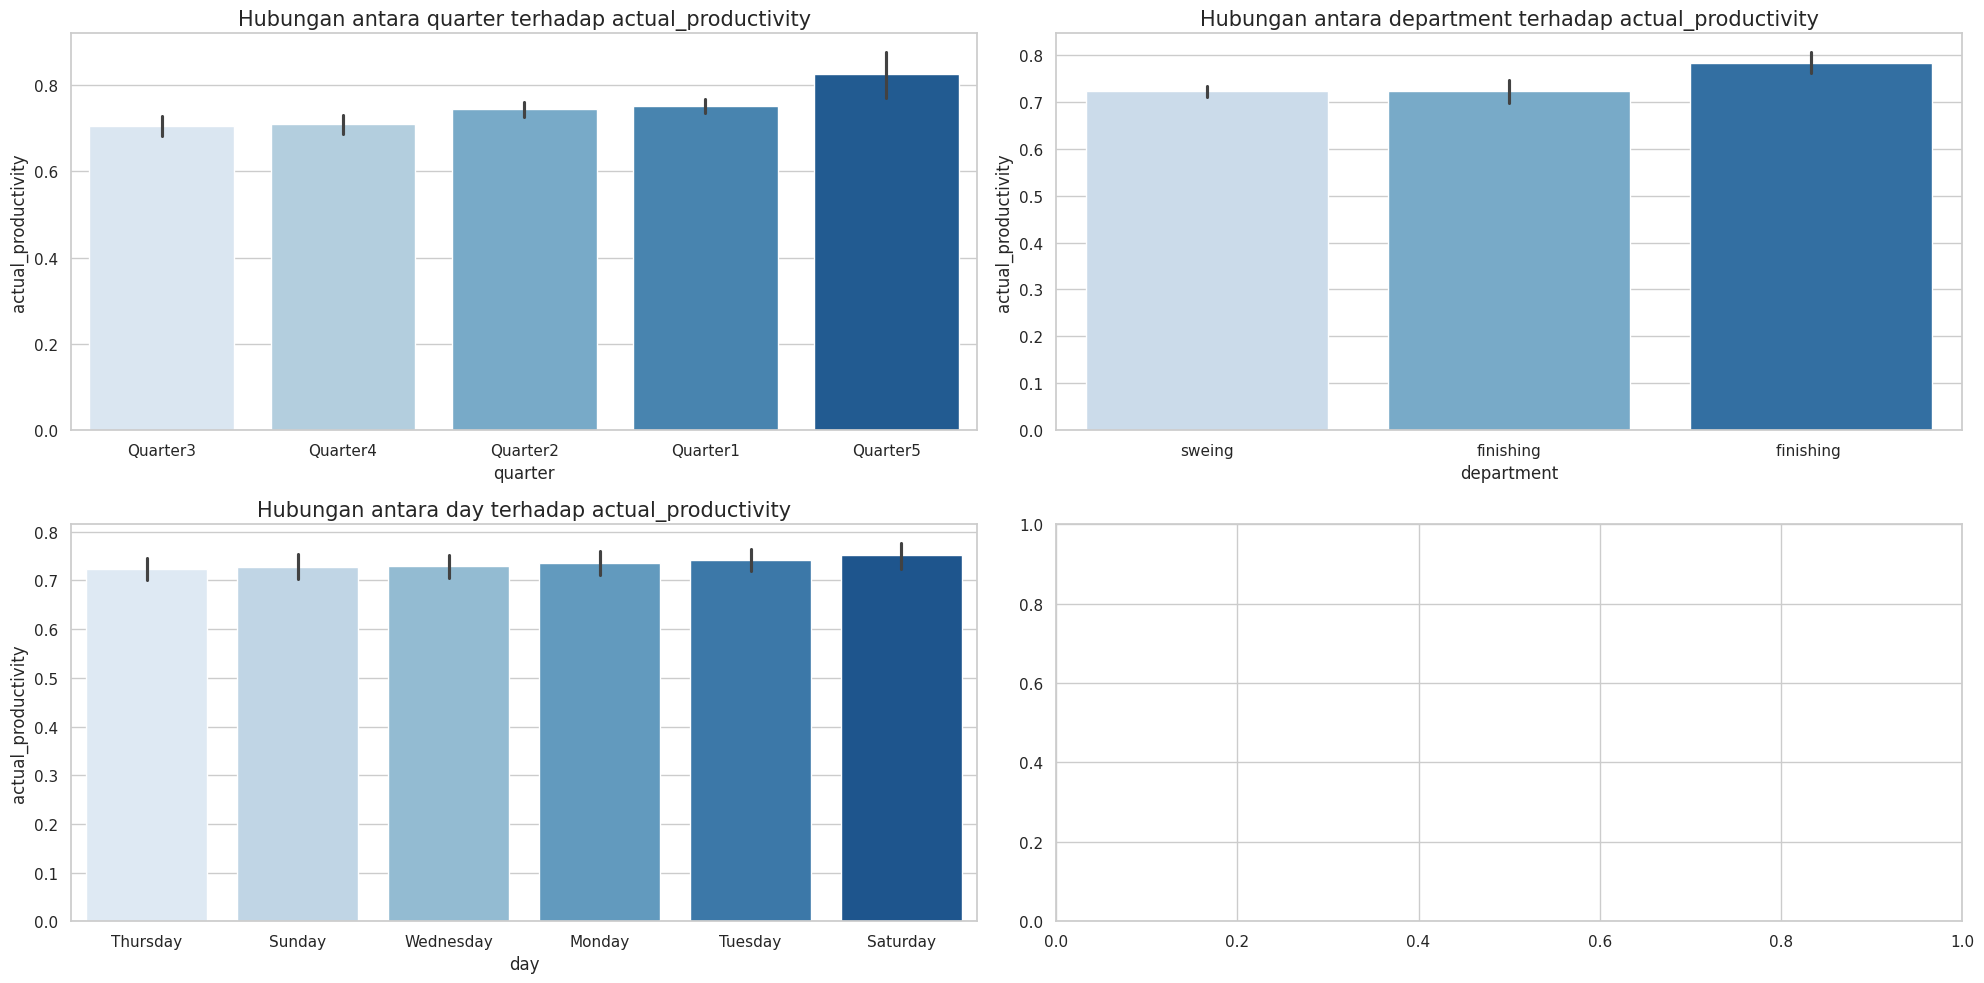

In [ ]:
bar_plot(df3, objek_vars, 'actual_productivity')

- Pada Quarter 5 menunjukkan performa karyawan terbaik melalui nilai **`actual_productivity`** lebih tinggi dibandingkan dengan kuartal lainnya. Hal ini menunjukkan ada pengaruh musiman atau strategi manajemen.
- **`Department`** finishing memiliki produktifitas aktual sedikit lebih tinggi dibandingkan dengan departemen sweing.
- Enam hari kerja **`day`** pada perusahaan gourmet menunjukkan produktifitas aktual yang sama rata.

#### Fitur sementara yang dipilih
- `targeted_productivity`
- `smv`
- `wip`
- `over_time`
- `incentive`
- `no_of_workers`
- `no_of_style_change`

### Data Preprocessing

### Feature Engineering
- Encoding
- Scalling

In [ ]:
df3.head(5)

quarter  department       day  team  targeted_productivity    smv  \
0  Quarter1      sweing  Thursday     8                   0.80  26.16   
1  Quarter1  finishing   Thursday     1                   0.75   3.94   
2  Quarter1      sweing  Thursday    11                   0.80  11.41   
3  Quarter1      sweing  Thursday    12                   0.80  11.41   
4  Quarter1      sweing  Thursday     6                   0.80  25.90   

           wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
0  1108.000000       7080         98        0.0         0                   0   
1  1190.465991        960          0        0.0         0                   0   
2   968.000000       3660         50        0.0         0                   0   
3   968.000000       3660         50        0.0         0                   0   
4  1170.000000       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity  
0           59.0             0.940725  
1            8.0             0.886500  
2           30.5             0.800570  
3           30.5             0.800570  
4           56.0             0.800382

#### Encoding kategorik variabel intoo numerik

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 131.0+ 

Variabel **`team`** perlu didiskusikan lebih lanjut. Karena terlihat seperti nomor atau urutan setiap team pada perusahaan. Jadi agak confused tentang penerapan encoding.

In [ ]:
# 'Day'
one_hot_day                 = OneHotEncoder(sparse_output=False)
day_reshaped                = df3['day'].values.reshape(-1, 1)
day_one_hot                 = one_hot_day.fit_transform(day_reshaped)
day_encoded                 = pd.DataFrame(day_one_hot, columns=one_hot_day.get_feature_names_out(['day']))
df3_day                     = pd.concat([df3.drop(columns=['day']), day_encoded], axis=1)

# 'Quarter'
ordinal                     = OrdinalEncoder()
df3_day['quarter_encod']    = ordinal.fit_transform(df3_day[['quarter']])

# 'Department'
one_hot_department          = OneHotEncoder(sparse_output=False)
department_reshaped         = df3_day['department'].values.reshape(-1, 1)
department_one_hot          = one_hot_department.fit_transform(department_reshaped)
department_encoded          = pd.DataFrame(department_one_hot, columns=one_hot_department.get_feature_names_out(['department']))
df3_day                     = pd.concat([df3_day.drop(columns=['department']), department_encoded], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df3_day.drop(columns=['quarter'], inplace=True)

In [ ]:
df3_day.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'quarter_encod',
       'department_finishing', 'department_finishing ', 'department_sweing'],
      dtype='object')

In [ ]:
df3_day['quarter_encod'].value_counts()

quarter_encod
0.0    360
1.0    335
3.0    248
2.0    210
4.0     44
Name: count, dtype: int64

In [ ]:
df3_day.dtypes

team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
day_Monday               float64
day_Saturday             float64
day_Sunday               float64
day_Thursday             float64
day_Tuesday              float64
day_Wednesday            float64
quarter_encod            float64
department_finishing     float64
department_finishing     float64
department_sweing        float64
dtype: object

In [ ]:
df3_day.shape

(1197, 21)

#### Scaling

- Cek distribusi data

In [ ]:
df3_day

team  targeted_productivity    smv          wip  over_time  incentive  \
0        8                   0.80  26.16  1108.000000       7080         98   
1        1                   0.75   3.94  1190.465991        960          0   
2       11                   0.80  11.41   968.000000       3660         50   
3       12                   0.80  11.41   968.000000       3660         50   
4        6                   0.80  25.90  1170.000000       1920         50   
...    ...                    ...    ...          ...        ...        ...   
1192    10                   0.75   2.90  1190.465991        960          0   
1193     8                   0.70   3.90  1190.465991        960          0   
1194     7                   0.65   3.90  1190.465991        960          0   
1195     9                   0.75   2.90  1190.465991       1800          0   
1196     6                   0.70   2.90  1190.465991        720          0   

      idle_time  idle_men  no_of_style_change  no_of_workers  ...  day_Monday  \
0           0.0         0                   0           59.0  ...         0.0   
1           0.0         0                   0            8.0  ...         0.0   
2           0.0         0                   0           30.5  ...         0.0   
3           0.0         0                   0           30.5  ...         0.0   
4           0.0         0                   0           56.0  ...         0.0   
...         ...       ...                 ...            ...  ...         ...   
1192        0.0         0                   0            8.0  ...         0.0   
1193        0.0         0                   0            8.0  ...         0.0   
1194        0.0         0                   0            8.0  ...         0.0   
1195        0.0         0                   0           15.0  ...         0.0   
1196        0.0         0                   0            6.0  ...         0.0   

      day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0              0.0         0.0           1.0          0.0            0.0   
1              0.0         0.0           1.0          0.0            0.0   
2              0.0         0.0           1.0          0.0            0.0   
3              0.0         0.0           1.0          0.0            0.0   
4              0.0         0.0           1.0          0.0            0.0   
...            ...         ...           ...          ...            ...   
1192           0.0         0.0           0.0          0.0            1.0   
1193           0.0         0.0           0.0          0.0            1.0   
1194           0.0         0.0           0.0          0.0            1.0   
1195           0.0         0.0           0.0          0.0            1.0   
1196           0.0         0.0           0.0          0.0            1.0   

      quarter_encod  department_finishing  department_finishing   \
0               0.0                   0.0                    0.0   
1               0.0                   0.0                    1.0   
2               0.0                   0.0                    0.0   
3               0.0                   0.0                    0.0   
4               0.0                   0.0                    0.0   
...             ...                   ...                    ...   
1192            1.0                   1.0                    0.0   
1193            1.0                   1.0                    0.0   
1194            1.0                   1.0                    0.0   
1195            1.0                   1.0                    0.0   
1196            1.0                   1.0                    0.0   

      department_sweing  
0                   1.0  
1                   0.0  
2                   1.0  
3                   1.0  
4                   1.0  
...                 ...  
1192                0.0  
1193                0.0  
1194                0.0  
1195                0.0  
1196                0.0  

[1197 rows x 21 columns]

In [ ]:
distribusi = ['smv', 'wip', 'over_time', 'incentive', 'no_of_workers', 'idle_time']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

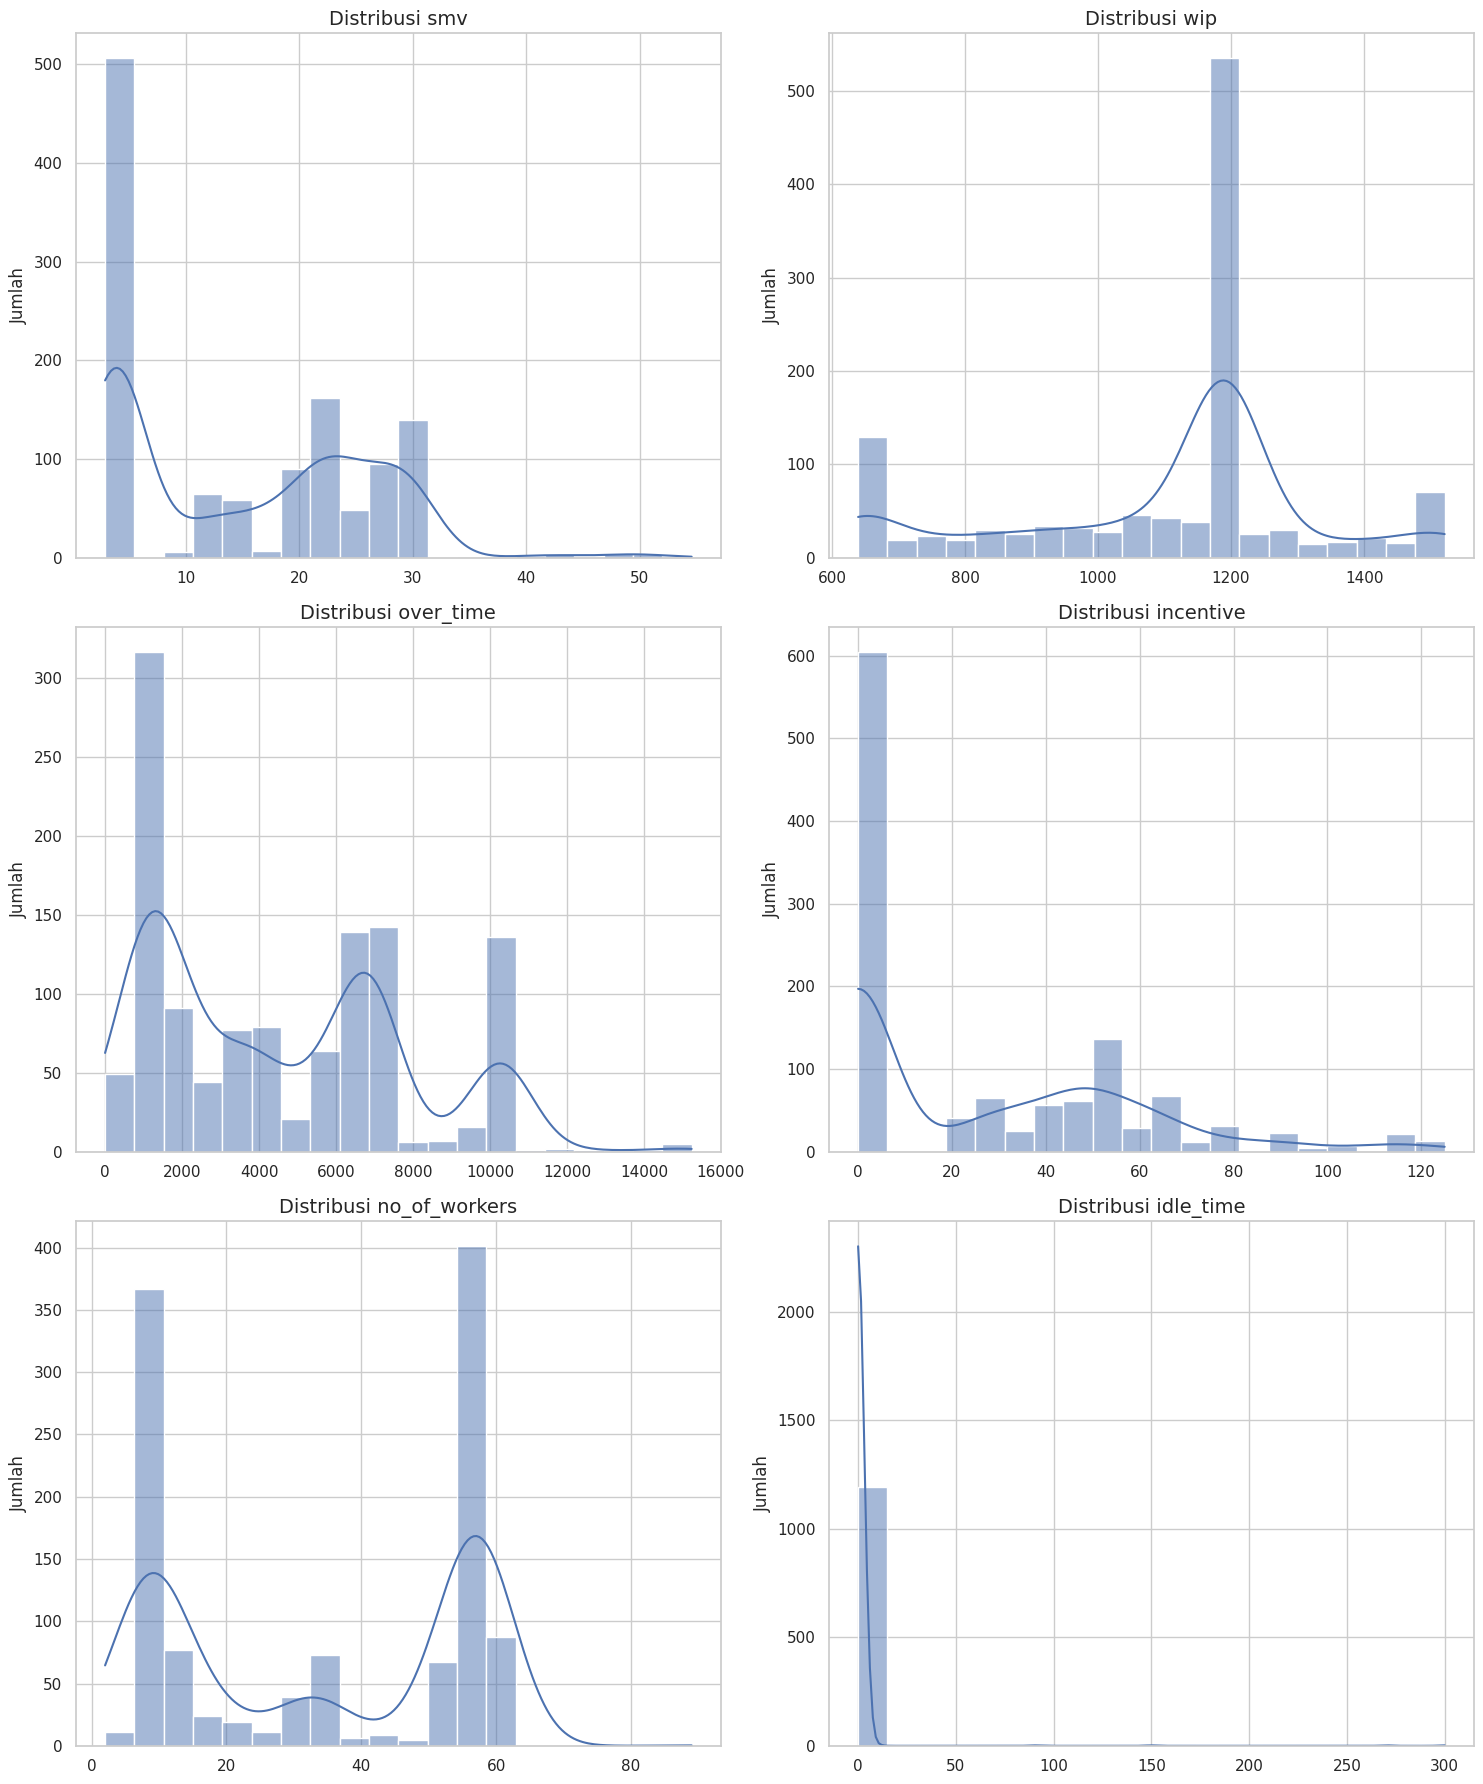

In [ ]:
rows    = (len(distribusi) + 1) // 2
cols    = 2
fig, ax = plt.subplots(rows,
                       cols,
                       figsize=(15, 6 * rows))

for i, var in enumerate(distribusi):

    row = i // cols
    col = i % cols
    sns.histplot(df3[var], ax=ax[row, col], kde=True, bins=20)
    ax[row, col].set_title(f'Distribusi {var}', fontsize=14)
    ax[row, col].set_xlabel('')
    ax[row, col].set_ylabel('Jumlah', fontsize=12)

plt.tight_layout()
plt.show()

![image.png](attachment:image.png)
- `smv` = distribusi sedikit skew
- `wip` = distribusi kurtosis
- `over_time` = distribusi normal
- `incentive` = distribusi skewness ke kanan
- `no_of_workers` = distribusi normal / Bimodial
- `idle_time` = distribusi skew

In [ ]:
df3_day

team  targeted_productivity    smv          wip  over_time  incentive  \
0        8                   0.80  26.16  1108.000000       7080         98   
1        1                   0.75   3.94  1190.465991        960          0   
2       11                   0.80  11.41   968.000000       3660         50   
3       12                   0.80  11.41   968.000000       3660         50   
4        6                   0.80  25.90  1170.000000       1920         50   
...    ...                    ...    ...          ...        ...        ...   
1192    10                   0.75   2.90  1190.465991        960          0   
1193     8                   0.70   3.90  1190.465991        960          0   
1194     7                   0.65   3.90  1190.465991        960          0   
1195     9                   0.75   2.90  1190.465991       1800          0   
1196     6                   0.70   2.90  1190.465991        720          0   

      idle_time  idle_men  no_of_style_change  no_of_workers  ...  day_Monday  \
0           0.0         0                   0           59.0  ...         0.0   
1           0.0         0                   0            8.0  ...         0.0   
2           0.0         0                   0           30.5  ...         0.0   
3           0.0         0                   0           30.5  ...         0.0   
4           0.0         0                   0           56.0  ...         0.0   
...         ...       ...                 ...            ...  ...         ...   
1192        0.0         0                   0            8.0  ...         0.0   
1193        0.0         0                   0            8.0  ...         0.0   
1194        0.0         0                   0            8.0  ...         0.0   
1195        0.0         0                   0           15.0  ...         0.0   
1196        0.0         0                   0            6.0  ...         0.0   

      day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0              0.0         0.0           1.0          0.0            0.0   
1              0.0         0.0           1.0          0.0            0.0   
2              0.0         0.0           1.0          0.0            0.0   
3              0.0         0.0           1.0          0.0            0.0   
4              0.0         0.0           1.0          0.0            0.0   
...            ...         ...           ...          ...            ...   
1192           0.0         0.0           0.0          0.0            1.0   
1193           0.0         0.0           0.0          0.0            1.0   
1194           0.0         0.0           0.0          0.0            1.0   
1195           0.0         0.0           0.0          0.0            1.0   
1196           0.0         0.0           0.0          0.0            1.0   

      quarter_encod  department_finishing  department_finishing   \
0               0.0                   0.0                    0.0   
1               0.0                   0.0                    1.0   
2               0.0                   0.0                    0.0   
3               0.0                   0.0                    0.0   
4               0.0                   0.0                    0.0   
...             ...                   ...                    ...   
1192            1.0                   1.0                    0.0   
1193            1.0                   1.0                    0.0   
1194            1.0                   1.0                    0.0   
1195            1.0                   1.0                    0.0   
1196            1.0                   1.0                    0.0   

      department_sweing  
0                   1.0  
1                   0.0  
2                   1.0  
3                   1.0  
4                   1.0  
...                 ...  
1192                0.0  
1193                0.0  
1194                0.0  
1195                0.0  
1196                0.0  

[1197 rows x 21 columns]

In [ ]:
X = df3_day.drop(['actual_productivity'], axis=1)
y = df3_day.actual_productivity

In [ ]:
X.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'quarter_encod', 'department_finishing',
       'department_finishing ', 'department_sweing'],
      dtype='object')

1. `smv` = min-max scaling
2. `wip` = robust scaling
3. `over_time` = min-max scaling
4. `incentive` = log transformation
5. `no_of_workers` = min-max scaling
6. `idle_time` = log transformation

In [ ]:
smv_scaler               = MinMaxScaler()
wip_scaler               = RobustScaler()
over_time_scaler         = MinMaxScaler()
incentive_scaler         = np.log1p
no_of_workers_scaler     = MinMaxScaler()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_skala                  = X.copy()

In [ ]:
X_skala['smv']           = smv_scaler.fit_transform(X[['smv']])

In [ ]:
X_skala['wip']           = wip_scaler.fit_transform(X[['wip']])

In [ ]:
X_skala['over_time']     = over_time_scaler.fit_transform(X[['over_time']])

In [ ]:
X_skala['incentive']     = incentive_scaler(X['incentive'])

In [ ]:
X_skala['idle_time']     = incentive_scaler(X['idle_time'])

In [ ]:
X_skala['no_of_workers'] = no_of_workers_scaler.fit_transform(X[['no_of_workers']])

In [ ]:
X_skala

team  targeted_productivity       smv       wip  over_time  incentive  \
0        8                   0.80  0.450252 -0.374053   0.464567   4.595120   
1        1                   0.75  0.020132  0.000000   0.062992   0.000000   
2       11                   0.80  0.164731 -1.009072   0.240157   3.931826   
3       12                   0.80  0.164731 -1.009072   0.240157   3.931826   
4        6                   0.80  0.445219 -0.092831   0.125984   3.931826   
...    ...                    ...       ...       ...        ...        ...   
1192    10                   0.75  0.000000  0.000000   0.062992   0.000000   
1193     8                   0.70  0.019357  0.000000   0.062992   0.000000   
1194     7                   0.65  0.019357  0.000000   0.062992   0.000000   
1195     9                   0.75  0.000000  0.000000   0.118110   0.000000   
1196     6                   0.70  0.000000  0.000000   0.047244   0.000000   

      idle_time  idle_men  no_of_style_change  no_of_workers  day_Monday  \
0           0.0         0                   0       0.655172         0.0   
1           0.0         0                   0       0.068966         0.0   
2           0.0         0                   0       0.327586         0.0   
3           0.0         0                   0       0.327586         0.0   
4           0.0         0                   0       0.620690         0.0   
...         ...       ...                 ...            ...         ...   
1192        0.0         0                   0       0.068966         0.0   
1193        0.0         0                   0       0.068966         0.0   
1194        0.0         0                   0       0.068966         0.0   
1195        0.0         0                   0       0.149425         0.0   
1196        0.0         0                   0       0.045977         0.0   

      day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0              0.0         0.0           1.0          0.0            0.0   
1              0.0         0.0           1.0          0.0            0.0   
2              0.0         0.0           1.0          0.0            0.0   
3              0.0         0.0           1.0          0.0            0.0   
4              0.0         0.0           1.0          0.0            0.0   
...            ...         ...           ...          ...            ...   
1192           0.0         0.0           0.0          0.0            1.0   
1193           0.0         0.0           0.0          0.0            1.0   
1194           0.0         0.0           0.0          0.0            1.0   
1195           0.0         0.0           0.0          0.0            1.0   
1196           0.0         0.0           0.0          0.0            1.0   

      quarter_encod  department_finishing  department_finishing   \
0               0.0                   0.0                    0.0   
1               0.0                   0.0                    1.0   
2               0.0                   0.0                    0.0   
3               0.0                   0.0                    0.0   
4               0.0                   0.0                    0.0   
...             ...                   ...                    ...   
1192            1.0                   1.0                    0.0   
1193            1.0                   1.0                    0.0   
1194            1.0                   1.0                    0.0   
1195            1.0                   1.0                    0.0   
1196            1.0                   1.0                    0.0   

      department_sweing  
0                   1.0  
1                   0.0  
2                   1.0  
3                   1.0  
4                   1.0  
...                 ...  
1192                0.0  
1193                0.0  
1194                0.0  
1195                0.0  
1196                0.0  

[1197 rows x 20 columns]

In [ ]:
X_skala.describe()

team  targeted_productivity          smv          wip  \
count  1197.000000            1197.000000  1197.000000  1197.000000   
mean      6.426901               0.736842     0.235427    -0.408341   
std       3.463963               0.075515     0.211832     1.047682   
min       1.000000               0.550000     0.000000    -2.500000   
25%       3.000000               0.700000     0.020132    -1.000000   
50%       6.000000               0.750000     0.239257     0.000000   
75%       9.000000               0.800000     0.413473     0.000000   
max      12.000000               0.800000     1.000000     1.500000   

         over_time    incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000  1197.000000         1197.000000   
mean      0.299117     1.943682     0.036899     0.369256            0.150376   
std       0.216918     1.982939     0.351984     3.268987            0.427848   
min       0.000000     0.000000     0.000000     0.000000            0.000000   
25%       0.094488     0.000000     0.000000     0.000000            0.000000   
50%       0.259843     0.000000     0.000000     0.000000            0.000000   
75%       0.456693     3.931826     0.000000     0.000000            0.000000   
max       1.000000     4.836282     5.707110    45.000000            2.000000   

       no_of_workers   day_Monday  day_Saturday   day_Sunday  day_Thursday  \
count    1197.000000  1197.000000   1197.000000  1197.000000   1197.000000   
mean        0.374826     0.166249      0.156224     0.169591      0.166249   
std         0.255146     0.372460      0.363219     0.375430      0.372460   
min         0.000000     0.000000      0.000000     0.000000      0.000000   
25%         0.080460     0.000000      0.000000     0.000000      0.000000   
50%         0.367816     0.000000      0.000000     0.000000      0.000000   
75%         0.632184     0.000000      0.000000     0.000000      0.000000   
max         1.000000     1.000000      1.000000     1.000000      1.000000   

       day_Tuesday  day_Wednesday  quarter_encod  department_finishing  \
count  1197.000000    1197.000000    1197.000000           1197.000000   
mean      0.167920       0.173768       1.399332              0.208020   
std       0.373951       0.379068       1.215535              0.406061   
min       0.000000       0.000000       0.000000              0.000000   
25%       0.000000       0.000000       0.000000              0.000000   
50%       0.000000       0.000000       1.000000              0.000000   
75%       0.000000       0.000000       2.000000              0.000000   
max       1.000000       1.000000       4.000000              1.000000   

       department_finishing   department_sweing  
count            1197.000000        1197.000000  
mean                0.214703           0.577277  
std                 0.410788           0.494199  
min                 0.000000           0.000000  
25%                 0.000000           0.000000  
50%                 0.000000           1.000000  
75%                 0.000000           1.000000  
max                 1.000000           1.000000

In [ ]:
df_3 = pd.concat([X_skala, y], axis=1)

In [ ]:
df_3

team  targeted_productivity       smv       wip  over_time  incentive  \
0        8                   0.80  0.450252 -0.374053   0.464567   4.595120   
1        1                   0.75  0.020132  0.000000   0.062992   0.000000   
2       11                   0.80  0.164731 -1.009072   0.240157   3.931826   
3       12                   0.80  0.164731 -1.009072   0.240157   3.931826   
4        6                   0.80  0.445219 -0.092831   0.125984   3.931826   
...    ...                    ...       ...       ...        ...        ...   
1192    10                   0.75  0.000000  0.000000   0.062992   0.000000   
1193     8                   0.70  0.019357  0.000000   0.062992   0.000000   
1194     7                   0.65  0.019357  0.000000   0.062992   0.000000   
1195     9                   0.75  0.000000  0.000000   0.118110   0.000000   
1196     6                   0.70  0.000000  0.000000   0.047244   0.000000   

      idle_time  idle_men  no_of_style_change  no_of_workers  ...  \
0           0.0         0                   0       0.655172  ...   
1           0.0         0                   0       0.068966  ...   
2           0.0         0                   0       0.327586  ...   
3           0.0         0                   0       0.327586  ...   
4           0.0         0                   0       0.620690  ...   
...         ...       ...                 ...            ...  ...   
1192        0.0         0                   0       0.068966  ...   
1193        0.0         0                   0       0.068966  ...   
1194        0.0         0                   0       0.068966  ...   
1195        0.0         0                   0       0.149425  ...   
1196        0.0         0                   0       0.045977  ...   

      day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0              0.0         0.0           1.0          0.0            0.0   
1              0.0         0.0           1.0          0.0            0.0   
2              0.0         0.0           1.0          0.0            0.0   
3              0.0         0.0           1.0          0.0            0.0   
4              0.0         0.0           1.0          0.0            0.0   
...            ...         ...           ...          ...            ...   
1192           0.0         0.0           0.0          0.0            1.0   
1193           0.0         0.0           0.0          0.0            1.0   
1194           0.0         0.0           0.0          0.0            1.0   
1195           0.0         0.0           0.0          0.0            1.0   
1196           0.0         0.0           0.0          0.0            1.0   

      quarter_encod  department_finishing  department_finishing   \
0               0.0                   0.0                    0.0   
1               0.0                   0.0                    1.0   
2               0.0                   0.0                    0.0   
3               0.0                   0.0                    0.0   
4               0.0                   0.0                    0.0   
...             ...                   ...                    ...   
1192            1.0                   1.0                    0.0   
1193            1.0                   1.0                    0.0   
1194            1.0                   1.0                    0.0   
1195            1.0                   1.0                    0.0   
1196            1.0                   1.0                    0.0   

      department_sweing  actual_productivity  
0                   1.0             0.940725  
1                   0.0             0.886500  
2                   1.0             0.800570  
3                   1.0             0.800570  
4                   1.0             0.800382  
...                 ...                  ...  
1192                0.0             0.628333  
1193                0.0             0.625625  
1194                0.0             0.625625  
1195                0.0     

In [ ]:
X = X_skala.copy()
df = df_3.copy()
y = y.copy()

In [ ]:
X

team  targeted_productivity       smv       wip  over_time  incentive  \
0        8                   0.80  0.450252 -0.374053   0.464567   4.595120   
1        1                   0.75  0.020132  0.000000   0.062992   0.000000   
2       11                   0.80  0.164731 -1.009072   0.240157   3.931826   
3       12                   0.80  0.164731 -1.009072   0.240157   3.931826   
4        6                   0.80  0.445219 -0.092831   0.125984   3.931826   
...    ...                    ...       ...       ...        ...        ...   
1192    10                   0.75  0.000000  0.000000   0.062992   0.000000   
1193     8                   0.70  0.019357  0.000000   0.062992   0.000000   
1194     7                   0.65  0.019357  0.000000   0.062992   0.000000   
1195     9                   0.75  0.000000  0.000000   0.118110   0.000000   
1196     6                   0.70  0.000000  0.000000   0.047244   0.000000   

      idle_time  idle_men  no_of_style_change  no_of_workers  day_Monday  \
0           0.0         0                   0       0.655172         0.0   
1           0.0         0                   0       0.068966         0.0   
2           0.0         0                   0       0.327586         0.0   
3           0.0         0                   0       0.327586         0.0   
4           0.0         0                   0       0.620690         0.0   
...         ...       ...                 ...            ...         ...   
1192        0.0         0                   0       0.068966         0.0   
1193        0.0         0                   0       0.068966         0.0   
1194        0.0         0                   0       0.068966         0.0   
1195        0.0         0                   0       0.149425         0.0   
1196        0.0         0                   0       0.045977         0.0   

      day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  \
0              0.0         0.0           1.0          0.0            0.0   
1              0.0         0.0           1.0          0.0            0.0   
2              0.0         0.0           1.0          0.0            0.0   
3              0.0         0.0           1.0          0.0            0.0   
4              0.0         0.0           1.0          0.0            0.0   
...            ...         ...           ...          ...            ...   
1192           0.0         0.0           0.0          0.0            1.0   
1193           0.0         0.0           0.0          0.0            1.0   
1194           0.0         0.0           0.0          0.0            1.0   
1195           0.0         0.0           0.0          0.0            1.0   
1196           0.0         0.0           0.0          0.0            1.0   

      quarter_encod  department_finishing  department_finishing   \
0               0.0                   0.0                    0.0   
1               0.0                   0.0                    1.0   
2               0.0                   0.0                    0.0   
3               0.0                   0.0                    0.0   
4               0.0                   0.0                    0.0   
...             ...                   ...                    ...   
1192            1.0                   1.0                    0.0   
1193            1.0                   1.0                    0.0   
1194            1.0                   1.0                    0.0   
1195            1.0                   1.0                    0.0   
1196            1.0                   1.0                    0.0   

      department_sweing  
0                   1.0  
1                   0.0  
2                   1.0  
3                   1.0  
4                   1.0  
...                 ...  
1192                0.0  
1193                0.0  
1194                0.0  
1195                0.0  
1196                0.0  

[1197 rows x 20 columns]

In [ ]:
y

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

### Feature Selection

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

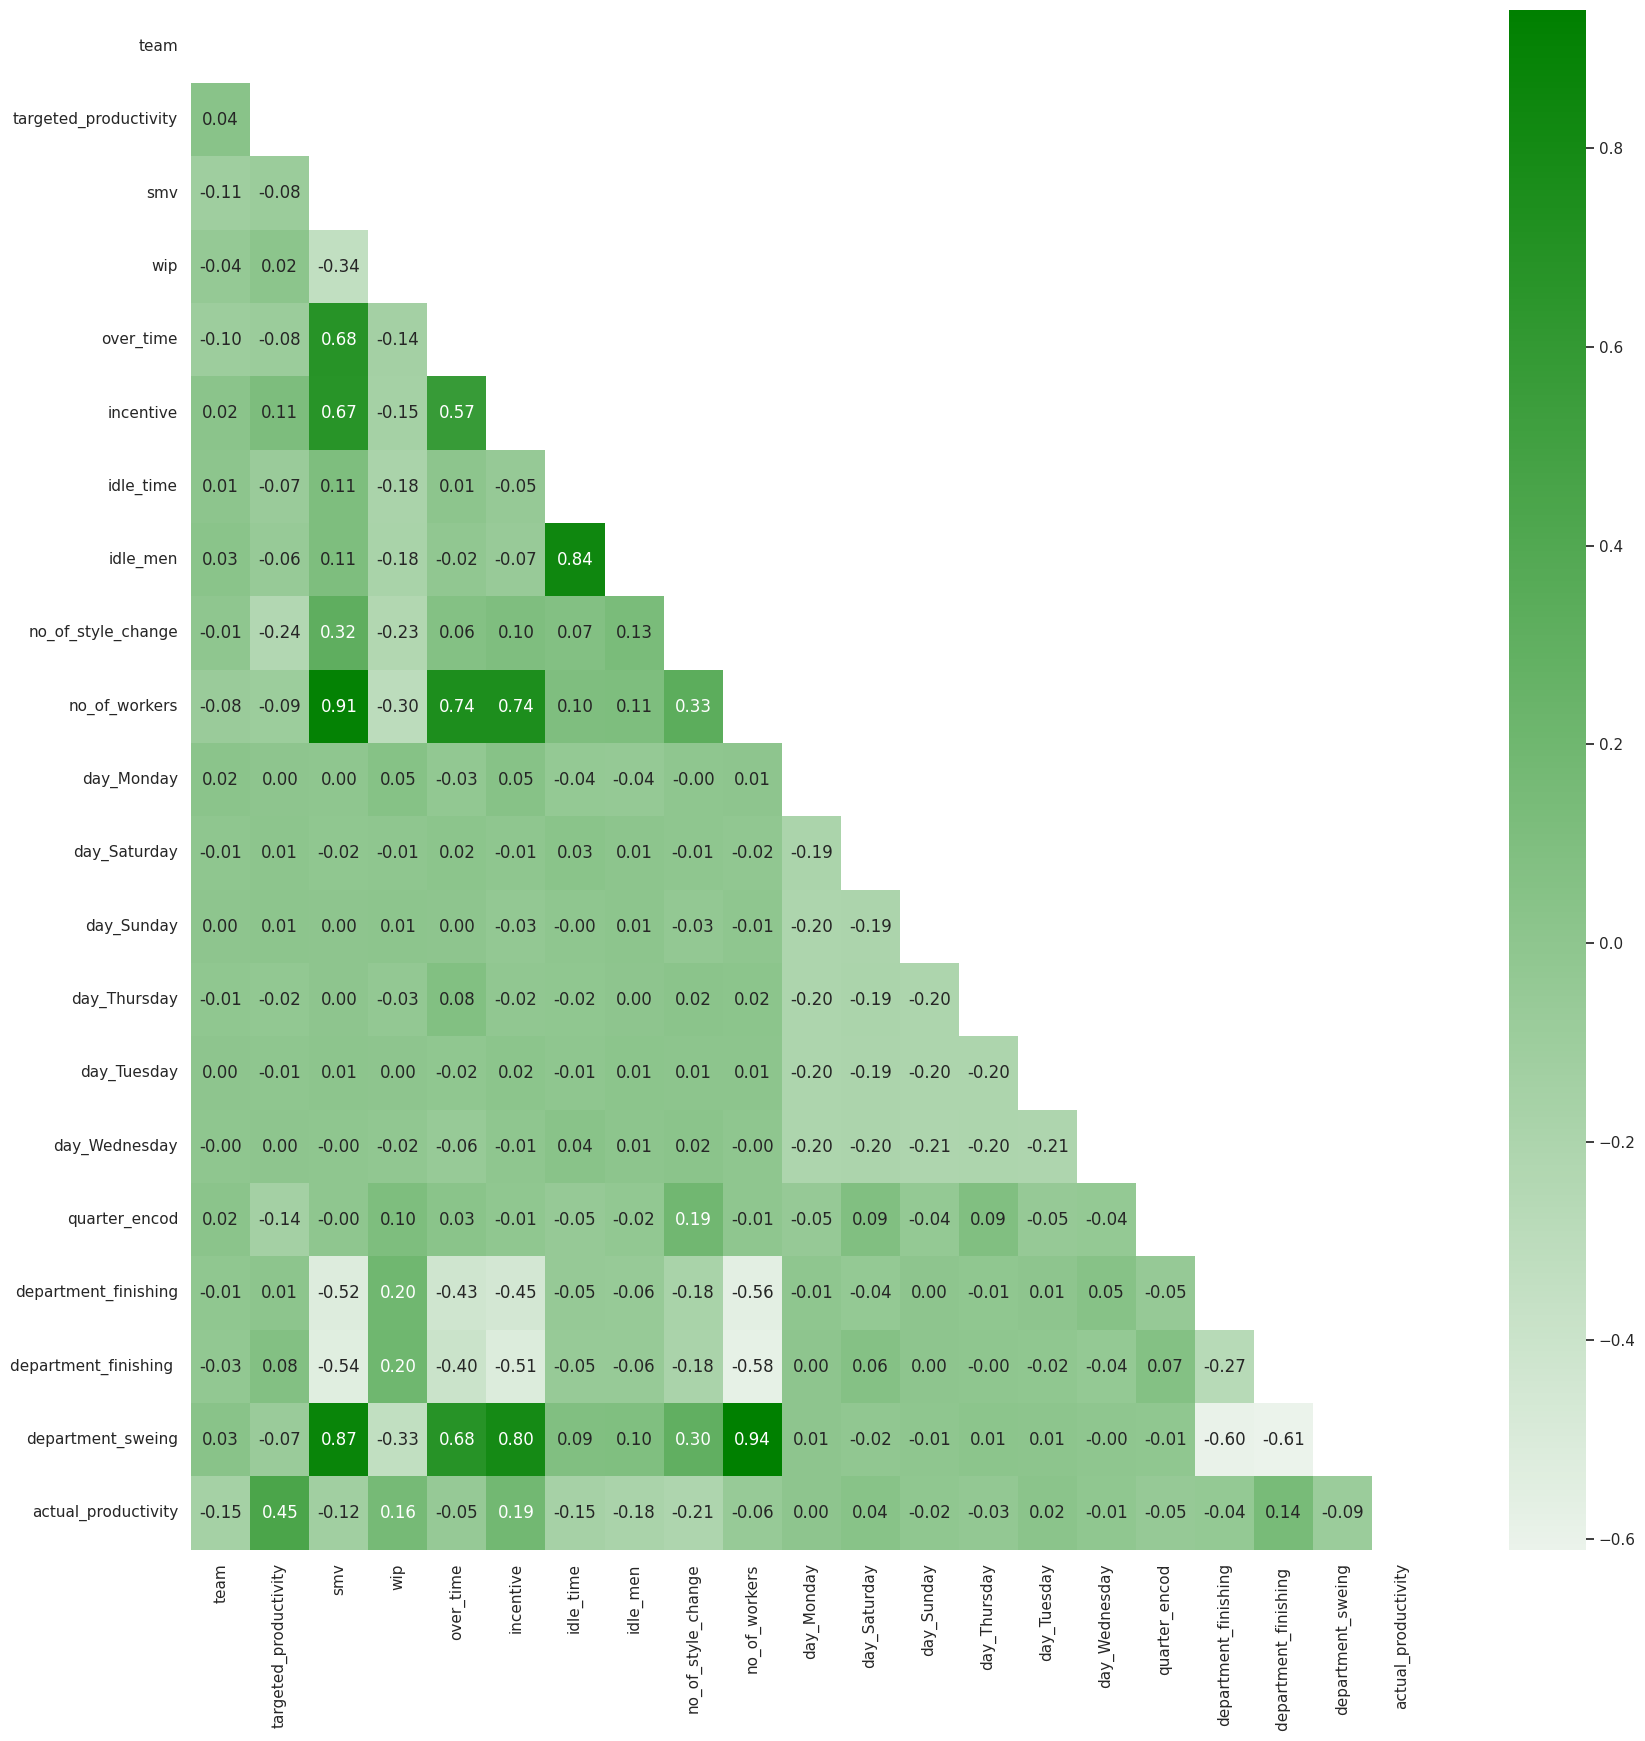

In [ ]:
# viz
sns.set(font_scale=1)
plt.figure(figsize=(20, 20))
sns.set_style("white")
cmap = sns.light_palette("green", as_cmap=True)

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(),
            annot=True,
            cmap=cmap,
            fmt='.2f',
            mask=mask)

plt.show()

#### Variabel yang positif terhadap variabel target
- `targeted_productivity`
- `incentive`

*perlu dilakukan pencarian fitur terbaik*

### Recursive Feature Elimination (RFE)
RFE adalah metode iteratif yang memilih fitur-fitur terbaik dengan cara melakukan berulang kali membangun model dan menghapus fitur yang paling sedikit berkontribusi pada model. Tujuan utamanya adalah untuk meningkatkan kinerja model dengan mengurangi jumlah fitur yang tidak relevan atau redundant.

Bebas pilih model regresi apa saja untuk mengevaluasi setiap fitur.

In [ ]:
model_fitur_linear = LinearRegression()
n_fitur_pilih      = 13

rfe                = RFE(estimator=model_fitur_linear,
                         n_features_to_select=n_fitur_pilih)

<IPython.core.display.Javascript object>

In [ ]:
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=13)

In [ ]:
fitur_pilih = X.columns[rfe.support_]
fitur_pilih

Index(['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'no_of_style_change', 'no_of_workers', 'day_Saturday',
       'day_Tuesday', 'department_finishing', 'department_finishing ',
       'department_sweing'],
      dtype='object')

In [ ]:
fitur_rank = pd.Series(rfe.ranking_, index=X.columns)
fitur_rank.sort_values()

team                     1
department_finishing     1
day_Tuesday              1
day_Saturday             1
department_finishing     1
no_of_style_change       1
no_of_workers            1
incentive                1
over_time                1
smv                      1
targeted_productivity    1
idle_time                1
department_sweing        1
day_Monday               2
wip                      3
idle_men                 4
day_Wednesday            5
day_Thursday             6
day_Sunday               7
quarter_encod            8
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

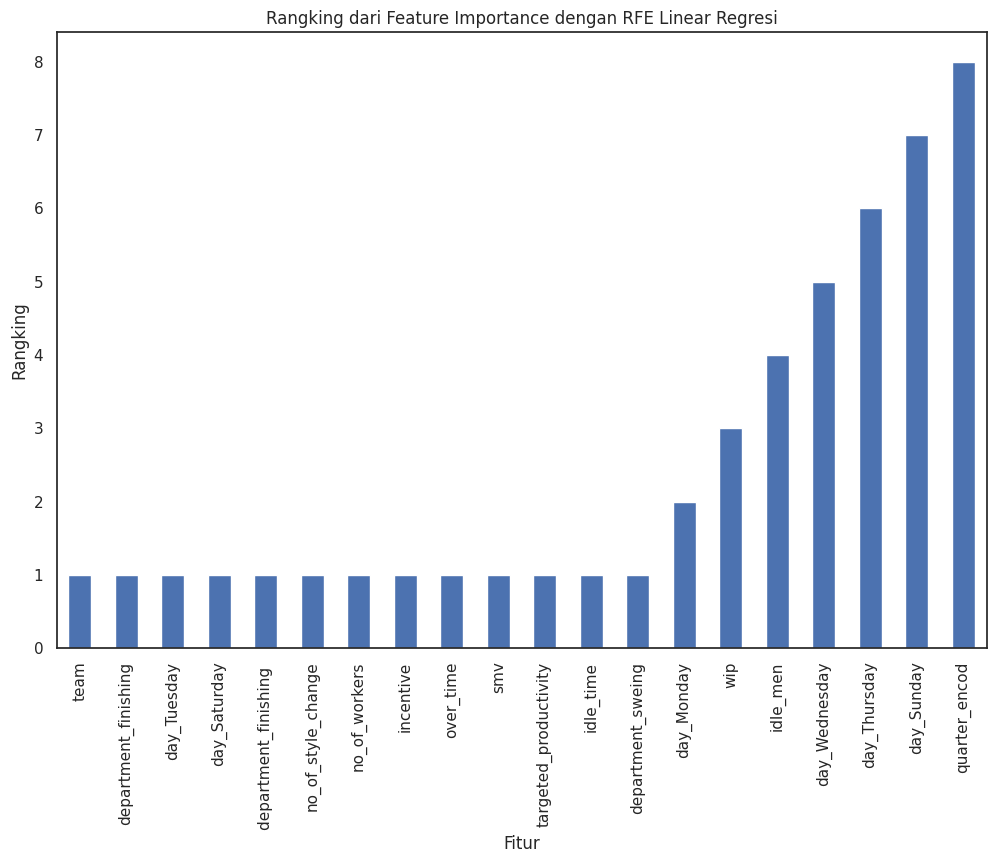

In [ ]:
plt.figure(figsize=(12, 8))
fitur_rank.sort_values().plot(kind='bar')
plt.title('Rangking dari Feature Importance dengan RFE Linear Regresi')
plt.xlabel('Fitur')
plt.ylabel('Rangking')
plt.show()

In [ ]:
X_baru = X[fitur_pilih]

In [ ]:
X_baru

team  targeted_productivity       smv  over_time  incentive  idle_time  \
0        8                   0.80  0.450252   0.464567   4.595120        0.0   
1        1                   0.75  0.020132   0.062992   0.000000        0.0   
2       11                   0.80  0.164731   0.240157   3.931826        0.0   
3       12                   0.80  0.164731   0.240157   3.931826        0.0   
4        6                   0.80  0.445219   0.125984   3.931826        0.0   
...    ...                    ...       ...        ...        ...        ...   
1192    10                   0.75  0.000000   0.062992   0.000000        0.0   
1193     8                   0.70  0.019357   0.062992   0.000000        0.0   
1194     7                   0.65  0.019357   0.062992   0.000000        0.0   
1195     9                   0.75  0.000000   0.118110   0.000000        0.0   
1196     6                   0.70  0.000000   0.047244   0.000000        0.0   

      no_of_style_change  no_of_workers  day_Saturday  day_Tuesday  \
0                      0       0.655172           0.0          0.0   
1                      0       0.068966           0.0          0.0   
2                      0       0.327586           0.0          0.0   
3                      0       0.327586           0.0          0.0   
4                      0       0.620690           0.0          0.0   
...                  ...            ...           ...          ...   
1192                   0       0.068966           0.0          0.0   
1193                   0       0.068966           0.0          0.0   
1194                   0       0.068966           0.0          0.0   
1195                   0       0.149425           0.0          0.0   
1196                   0       0.045977           0.0          0.0   

      department_finishing  department_finishing   department_sweing  
0                      0.0                    0.0                1.0  
1                      0.0                    1.0                0.0  
2                      0.0                    0.0                1.0  
3                      0.0                    0.0                1.0  
4                      0.0                    0.0                1.0  
...                    ...                    ...                ...  
1192                   1.0                    0.0                0.0  
1193                   1.0                    0.0                0.0  
1194                   1.0                    0.0                0.0  
1195                   1.0                    0.0                0.0  
1196                   1.0                    0.0                0.0  

[1197 rows x 13 columns]

#### Imbalanced Case Handling SMOTE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

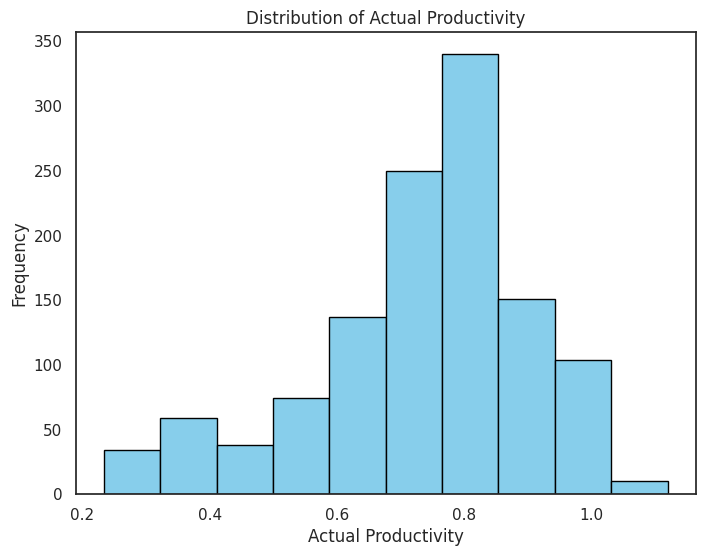

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

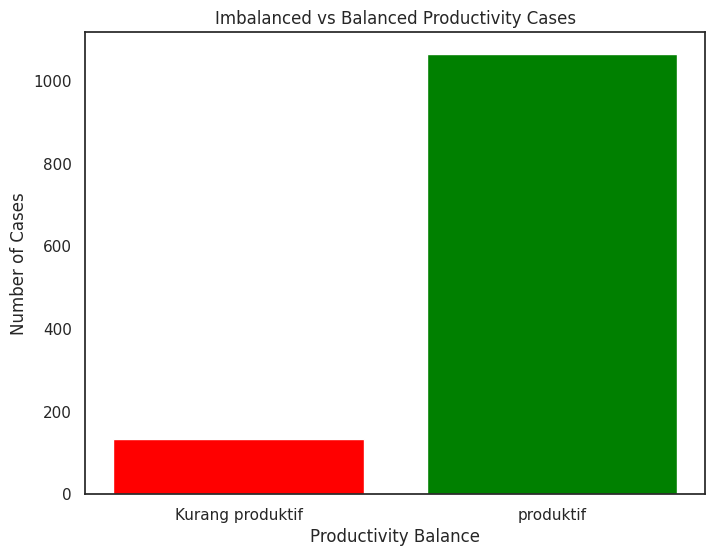

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['actual_productivity'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Productivity')
plt.show()

# Visualisasi bar plot untuk menampilkan jumlah kasus imbalanced
threshold              = 0.5
cases_kurang_produktif = df[df['actual_productivity'] < threshold].shape[0]
cases_produktif        = df[df['actual_productivity'] >= threshold].shape[0]

plt.figure(figsize=(8, 6))
plt.bar(['Kurang produktif', 'produktif'], [cases_kurang_produktif, cases_produktif], color=['red', 'green'])
plt.xlabel('Productivity Balance')
plt.ylabel('Number of Cases')
plt.title('Imbalanced vs Balanced Productivity Cases')
plt.show()

In [ ]:
df_2 = pd.concat([X_baru, y], axis=1)

In [ ]:
df_2

team  targeted_productivity       smv  over_time  incentive  idle_time  \
0        8                   0.80  0.450252   0.464567   4.595120        0.0   
1        1                   0.75  0.020132   0.062992   0.000000        0.0   
2       11                   0.80  0.164731   0.240157   3.931826        0.0   
3       12                   0.80  0.164731   0.240157   3.931826        0.0   
4        6                   0.80  0.445219   0.125984   3.931826        0.0   
...    ...                    ...       ...        ...        ...        ...   
1192    10                   0.75  0.000000   0.062992   0.000000        0.0   
1193     8                   0.70  0.019357   0.062992   0.000000        0.0   
1194     7                   0.65  0.019357   0.062992   0.000000        0.0   
1195     9                   0.75  0.000000   0.118110   0.000000        0.0   
1196     6                   0.70  0.000000   0.047244   0.000000        0.0   

      no_of_style_change  no_of_workers  day_Saturday  day_Tuesday  \
0                      0       0.655172           0.0          0.0   
1                      0       0.068966           0.0          0.0   
2                      0       0.327586           0.0          0.0   
3                      0       0.327586           0.0          0.0   
4                      0       0.620690           0.0          0.0   
...                  ...            ...           ...          ...   
1192                   0       0.068966           0.0          0.0   
1193                   0       0.068966           0.0          0.0   
1194                   0       0.068966           0.0          0.0   
1195                   0       0.149425           0.0          0.0   
1196                   0       0.045977           0.0          0.0   

      department_finishing  department_finishing   department_sweing  \
0                      0.0                    0.0                1.0   
1                      0.0                    1.0                0.0   
2                      0.0                    0.0                1.0   
3                      0.0                    0.0                1.0   
4                      0.0                    0.0                1.0   
...                    ...                    ...                ...   
1192                   1.0                    0.0                0.0   
1193                   1.0                    0.0                0.0   
1194                   1.0                    0.0                0.0   
1195                   1.0                    0.0                0.0   
1196                   1.0                    0.0                0.0   

      actual_productivity  
0                0.940725  
1                0.886500  
2                0.800570  
3                0.800570  
4                0.800382  
...                   ...  
1192             0.628333  
1193             0.625625  
1194             0.625625  
1195             0.505889  
1196             0.394722  

[1197 rows x 14 columns]

In [ ]:
over_df = smoter(df_2, y='actual_productivity')

r_index: 100%|##########| 39/39 [00:00<00:00, 535.42it/s]


In [ ]:
X_resampled = over_df.drop('actual_productivity', axis=1)
X_resampled

team  targeted_productivity       smv  over_time  incentive  idle_time  \
0     8.0               0.800000  0.450252   0.464567   4.595120        0.0   
6     2.0               0.750000  0.020132   0.062992   0.000000        0.0   
7     3.0               0.750000  0.487418   0.452756   3.828641        0.0   
9     1.0               0.750000  0.487418   0.452756   3.828641        0.0   
14    8.0               0.750000  0.000000   0.062992   0.000000        0.0   
..    ...                    ...       ...        ...        ...        ...   
406   3.0               0.745022  0.526520   0.462835   3.482759        0.0   
407   7.0               0.800000  0.000000   0.099829   0.000000        0.0   
408   1.0               0.700000  0.019646   0.121653   0.000000        0.0   
409   8.0               0.696867  0.420555   0.449806   0.000000        0.0   
410   6.0               0.649733  0.000000   0.062992   0.000000        0.0   

     no_of_style_change  no_of_workers  day_Saturday  day_Tuesday  \
0                   0.0       0.655172      0.000000     0.000000   
6                   0.0       0.068966      0.000000     0.000000   
7                   0.0       0.637931      0.000000     0.000000   
9                   0.0       0.637931      0.000000     0.000000   
14                  0.0       0.068966      0.000000     0.000000   
..                  ...            ...           ...          ...   
406                 1.0       0.652645      0.219913     0.000000   
407                 0.0       0.068966      0.000000     0.000000   
408                 0.0       0.068966      0.000000     0.372498   
409                 0.0       0.633624      0.000000     0.000000   
410                 0.0       0.068966      0.000000     0.000000   

     department_finishing  department_finishing   department_sweing  
0                     0.0                    0.0                1.0  
6                     0.0                    1.0                0.0  
7                     0.0                    0.0                1.0  
9                     0.0                    0.0                1.0  
14                    0.0                    1.0                0.0  
..                    ...                    ...                ...  
406                   0.0                    0.0                1.0  
407                   0.0                    1.0                0.0  
408                   1.0                    0.0                0.0  
409                   0.0                    0.0                1.0  
410                   1.0                    0.0                0.0  

[1010 rows x 13 columns]

In [ ]:
X_resampled.rename(columns={X_resampled.columns[11]: 'department_finishing2'}, inplace=True)

In [ ]:
X_resampled

team  targeted_productivity       smv  over_time  incentive  idle_time  \
0     8.0               0.800000  0.450252   0.464567   4.595120        0.0   
6     2.0               0.750000  0.020132   0.062992   0.000000        0.0   
7     3.0               0.750000  0.487418   0.452756   3.828641        0.0   
9     1.0               0.750000  0.487418   0.452756   3.828641        0.0   
14    8.0               0.750000  0.000000   0.062992   0.000000        0.0   
..    ...                    ...       ...        ...        ...        ...   
406   3.0               0.745022  0.526520   0.462835   3.482759        0.0   
407   7.0               0.800000  0.000000   0.099829   0.000000        0.0   
408   1.0               0.700000  0.019646   0.121653   0.000000        0.0   
409   8.0               0.696867  0.420555   0.449806   0.000000        0.0   
410   6.0               0.649733  0.000000   0.062992   0.000000        0.0   

     no_of_style_change  no_of_workers  day_Saturday  day_Tuesday  \
0                   0.0       0.655172      0.000000     0.000000   
6                   0.0       0.068966      0.000000     0.000000   
7                   0.0       0.637931      0.000000     0.000000   
9                   0.0       0.637931      0.000000     0.000000   
14                  0.0       0.068966      0.000000     0.000000   
..                  ...            ...           ...          ...   
406                 1.0       0.652645      0.219913     0.000000   
407                 0.0       0.068966      0.000000     0.000000   
408                 0.0       0.068966      0.000000     0.372498   
409                 0.0       0.633624      0.000000     0.000000   
410                 0.0       0.068966      0.000000     0.000000   

     department_finishing  department_finishing2  department_sweing  
0                     0.0                    0.0                1.0  
6                     0.0                    1.0                0.0  
7                     0.0                    0.0                1.0  
9                     0.0                    0.0                1.0  
14                    0.0                    1.0                0.0  
..                    ...                    ...                ...  
406                   0.0                    0.0                1.0  
407                   0.0                    1.0                0.0  
408                   1.0                    0.0                0.0  
409                   0.0                    0.0                1.0  
410                   1.0                    0.0                0.0  

[1010 rows x 13 columns]

In [ ]:
y_resampled = over_df['actual_productivity']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

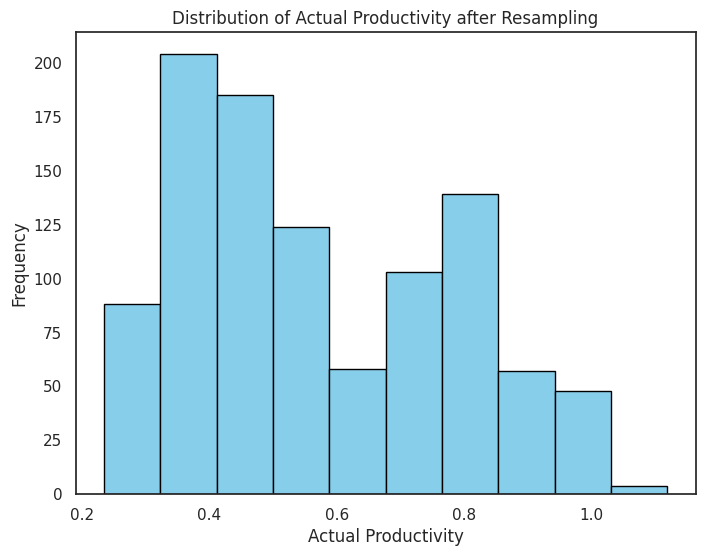

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

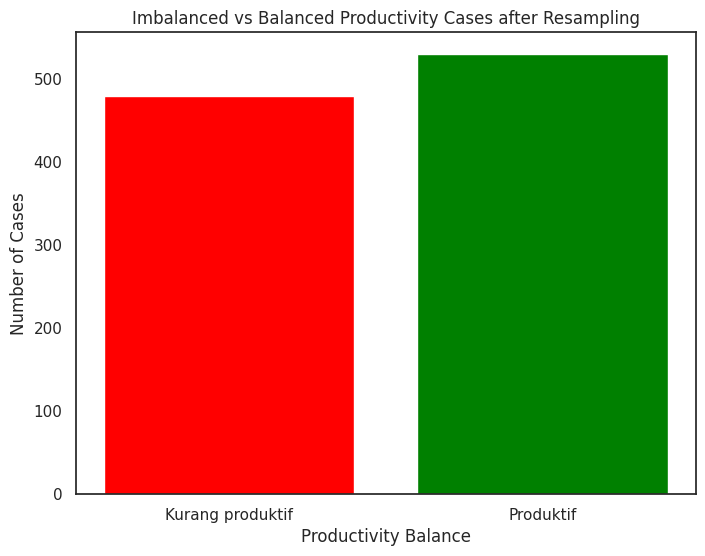

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(y_resampled, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Productivity after Resampling')
plt.show()

threshold = 0.5
cases_kurang_produktif = (y_resampled < threshold).sum()
cases_produktif = (y_resampled >= threshold).sum()

plt.figure(figsize=(8, 6))
plt.bar(['Kurang produktif', 'Produktif'], [cases_kurang_produktif, cases_produktif], color=['red', 'green'])
plt.xlabel('Productivity Balance')
plt.ylabel('Number of Cases')
plt.title('Imbalanced vs Balanced Productivity Cases after Resampling')
plt.show()

## Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.25,
                                                    random_state=42)

<IPython.core.display.Javascript object>

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(757, 13)
(253, 13)
(757,)
(253,)


In [ ]:
X_train

team  targeted_productivity       smv  over_time  incentive  idle_time  \
540    7.0               0.700000  0.399535   0.440945   0.000000        0.0   
165    1.0               0.665931  0.622746   0.660132   3.196984        0.0   
868   12.0               0.800000  0.239257   0.267717   4.158883        0.0   
316    4.0               0.603575  0.350317   0.519962   0.000000        0.0   
1041   1.0               0.700000  0.020132   0.220472   0.000000        0.0   
...    ...                    ...       ...        ...        ...        ...   
235    5.0               0.700000  0.346303   0.685039   0.000000        0.0   
571   12.0               0.750000  0.022842   0.070866   0.000000        0.0   
261    9.0               0.800000  0.391393   0.399421   0.000000        0.0   
886   12.0               0.800000  0.043167   0.070866   0.000000        0.0   
228   12.0               0.800000  0.168602   0.372047   3.931826        0.0   

      no_of_style_change  no_of_workers  day_Saturday  day_Tuesday  \
540                  0.0       0.620690           1.0          0.0   
165                  0.0       0.619439           0.0          0.0   
868                  0.0       0.367816           0.0          0.0   
316                  0.0       0.634650           0.0          0.0   
1041                 0.0       0.068966           0.0          1.0   
...                  ...            ...           ...          ...   
235                  0.0       0.643678           0.0          1.0   
571                  0.0       0.080460           0.0          0.0   
261                  0.0       0.560075           0.0          0.0   
886                  0.0       0.080460           0.0          0.0   
228                  0.0       0.339080           0.0          1.0   

      department_finishing  department_finishing2  department_sweing  
540                    0.0                    0.0                1.0  
165                    0.0                    0.0                1.0  
868                    0.0                    0.0                1.0  
316                    0.0                    0.0                1.0  
1041                   1.0                    0.0                0.0  
...                    ...                    ...                ...  
235                    0.0                    0.0                1.0  
571                    0.0                    1.0                0.0  
261                    0.0                    0.0                1.0  
886                    1.0                    0.0                0.0  
228                    0.0                    0.0                1.0  

[757 rows x 13 columns]

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1197 entries, 0 to 1196
Series name: actual_productivity
Non-Null Count  Dtype  
--------------  -----  
1197 non-null   float64
dtypes: float64(1)
memory usage: 9.5 KB


In [ ]:
def regression_model_report(y_true, y_pred):
    y_true = np.ravel(y_true)  # array 1D
    y_pred = np.ravel(y_pred)  # array 1D

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Mencari smape dengan rumus
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

    print("MAE: {:.4f}".format(mae))  # Mean Absolute Error
    print("MSE: {:.4f}".format(mse))  # Mean Squared Error
    print("RMSE: {:.4f}".format(rmse))  # Root Mean Squared Error
    print("sMAPE: {:.4f}%".format(smape))  # Symmetric Mean Absolute Percentage Error

#### Smape
![image.png](attachment:image.png)

In [ ]:
linear_regression       = LinearRegression()
knn_regressor           = KNeighborsRegressor(n_neighbors=30, algorithm="auto")  # 'auto' mencari algoritma terbaiknya
decision_tree_regressor = DecisionTreeRegressor(max_depth=10, criterion="squared_error")
random_forest_regressor = RandomForestRegressor(max_depth=15, criterion="squared_error", n_estimators=38)
svm_rbf_regressor       = SVR(kernel='rbf')
mlp_regressor           = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
xgboost_regressor       = xgb.XGBRegressor()
lightgbm_regressor      = lgb.LGBMRegressor()
catboost_regressor      = CatBoostRegressor(verbose=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
models = {
    "Linear Regression"       : linear_regression,
    "KNN Regression"          : knn_regressor,
    "Decision Tree Regression": decision_tree_regressor,
    "Random Forest Regression": random_forest_regressor,
    "SVM RBF Regression"      : svm_rbf_regressor,
    "MLP Regression"          : mlp_regressor,
    "XGBoost Regression"      : xgboost_regressor,
    "LightGBM Regression"     : lightgbm_regressor,
    "CatBoost Regression"     : catboost_regressor
}

#### Train Data

In [ ]:
print("*" * 46, "Performa Model ML pada Data Train", "*" * 46, "\n")

for nama_model, model in models.items():

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)

    print(f"{nama_model} Train: ")
    regression_model_report(y_train, y_pred_train)
    print("=" * 25 + "\n")

********************************************** Performa Model ML pada Data Train ********************************************** 

Linear Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1134
MSE: 0.0227
RMSE: 0.1506
sMAPE: 21.1508%

KNN Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1242
MSE: 0.0248
RMSE: 0.1576
sMAPE: 22.4250%

Decision Tree Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0440
MSE: 0.0073
RMSE: 0.0852
sMAPE: 9.3702%

Random Forest Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0355
MSE: 0.0032
RMSE: 0.0564
sMAPE: 7.0741%

SVM RBF Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1156
MSE: 0.0228
RMSE: 0.1509
sMAPE: 21.1628%

MLP Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1115
MSE: 0.0214
RMSE: 0.1461
sMAPE: 20.7408%

XGBoost Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0129
MSE: 0.0010
RMSE: 0.0315
sMAPE: 2.5486%

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 753
[LightGBM] [Info] Number of data points in the train set: 757, number of used features: 13
[LightGBM] [Info] Start training from score 0.564644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0438
MSE: 0.0051
RMSE: 0.0716
sMAPE: 8.3226%

CatBoost Regression Train: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0352
MSE: 0.0031
RMSE: 0.0560
sMAPE: 6.9119%



#### Test Data

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 540 to 228
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   757 non-null    float64
 1   targeted_productivity  757 non-null    float64
 2   smv                    757 non-null    float64
 3   over_time              757 non-null    float64
 4   incentive              757 non-null    float64
 5   idle_time              757 non-null    float64
 6   no_of_style_change     757 non-null    float64
 7   no_of_workers          757 non-null    float64
 8   day_Saturday           757 non-null    float64
 9   day_Tuesday            757 non-null    float64
 10  department_finishing   757 non-null    float64
 11  department_finishing2  757 non-null    float64
 12  department_sweing      757 non-null    float64
dtypes: float64(13)
memory usage: 82.8 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 30 to 186
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   253 non-null    float64
 1   targeted_productivity  253 non-null    float64
 2   smv                    253 non-null    float64
 3   over_time              253 non-null    float64
 4   incentive              253 non-null    float64
 5   idle_time              253 non-null    float64
 6   no_of_style_change     253 non-null    float64
 7   no_of_workers          253 non-null    float64
 8   day_Saturday           253 non-null    float64
 9   day_Tuesday            253 non-null    float64
 10  department_finishing   253 non-null    float64
 11  department_finishing2  253 non-null    float64
 12  department_sweing      253 non-null    float64
dtypes: float64(13)
memory usage: 27.7 KB


In [ ]:
print("*"*50, "Performa Testing Model ML", "*"*50, "\n")

for nama_model, model in models.items():

    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    print(f"{nama_model} Test: ")
    regression_model_report(y_test, y_pred_test)

    print("="*25 + "\n")

************************************************** Performa Testing Model ML ************************************************** 

Linear Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1340
MSE: 0.0319
RMSE: 0.1787
sMAPE: 24.0604%

KNN Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1494
MSE: 0.0370
RMSE: 0.1924
sMAPE: 26.0488%

Decision Tree Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1025
MSE: 0.0256
RMSE: 0.1601
sMAPE: 18.8910%

Random Forest Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0945
MSE: 0.0214
RMSE: 0.1464
sMAPE: 17.1179%

SVM RBF Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1393
MSE: 0.0337
RMSE: 0.1836
sMAPE: 24.5352%

MLP Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1326
MSE: 0.0315
RMSE: 0.1774
sMAPE: 23.7224%

XGBoost Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0950
MSE: 0.0221
RMSE: 0.1488
sMAPE: 17.6677%

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 753
[LightGBM] [Info] Number of data points in the train set: 757, number of used features: 13
[LightGBM] [Info] Start training from score 0.564644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0934
MSE: 0.0187
RMSE: 0.1366
sMAPE: 17.3091%

CatBoost Regression Test: 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0921
MSE: 0.0191
RMSE: 0.1383
sMAPE: 16.8947%



### Evaluation

#### Analisis Hasil Evaluasi Model Train & Test
![image.png](attachment:image.png)

**Interpretasi SMAPE**
- sMAPE = 0%: Model prediksi sempurna, tanpa kesalahan.
- sMAPE > 0%: Ada kesalahan dalam prediksi model.


- sMAPE yang lebih rendah: Menunjukkan model dengan kesalahan yang lebih kecil dan performa yang lebih baik.
- sMAPE yang lebih tinggi: Menunjukkan model dengan kesalahan yang lebih besar dan performa yang lebih buruk.

- `Linear Regression`:
Model ini memiliki performa sedang pada data train dan data test, yaitu tidak terlalu rendah dan tidak terlalu tinggi yaitu **stabil**, menunjukkan bahwa model ini tidak mengalami overfitting atau underfitting yang signifikan, namun tidak terlalu bagus digunakan.

- `KNN Regression`:
Model ini juga memiliki performa yang **stabil** pada data train dan data test, namun tidak terlalu bagus digunakan.

- `Decision Tree Regression`:
Model ini cukup baik dalam memprediksi nilai aktual produktivitas buruh pada data train, namun performa model menurun jika dilihat dari sMAPE sehingga ada kemungkinan model mengalami **overfitting**.

- `Random Forest Regression`:
Model ini juga memiliki performa yang sangat baik pada data train, namun performa model menurun ketika diterapkan pada data testing sehingga model mungkin **overfitting**

- `SVM RBF Regression`:
Pada data train, model ini memiliki nilai parameter yang relatif tinggi. Ketika pada data test, nilai-nilai tersebut tidak berbeda jauh, menunjukkan bahwa model ini tidak mengalami overfitting atau underfitting yang signifikan atau **stabil** namun tidak terlalu bagus digunakan.

- `MLP Regression`:
Hasil nilai evaluasi pada data train dan data test cukup stabil dengan nilai parameter cukup tinggi berada pada rentang 0,1, hal ini menunjukkan model mengalami sedikit **overfitting**.

- `XGBoost Regression`:
Pada data train, model ini memiliki performa yang sangat bagus dengan parameter evaluasi yang relatif rendah. Ketika pada data test, performa model sedikit menurun, namun hal ini masih bisa dioptimalkan untuk tujuan **good fit**.

- `LightGBM Regression`:
Pada data train, model ini memiliki nilai MAE, MSE, RMSE, dan sMAPE yang relatif rendah, menunjukkan bahwa model ini cukup baik dalam memprediksi nilai aktual produktivitas buruh. Pada data test, nilai-nilai tersebut sedikit meningkat sehingga masih bisa dioptimalkan untuk **good fit**.

- `CatBoost Regression`:
Hampir sama seperti LightGBM namun CatBoost ini memiliki performa yang sedikit lebih baik, sehingga masih bisa dioptimalkan untuk **good fit**.

### Memilih Model Terbaik
- Nilai MAE, MSE, dan RMSE akan sangat bagus jika dibawah atau lebih kecil dari 0,1
- Nilai SMAPE yang dipilih itu pada rentant 10% - 15%

### Top 3 Model Terbaik
1. **Random Forest Regression**
2. **CatBoost Regression**
3. **XGBoost Regression**

In [ ]:
def regression_model_report_viz(y_true, y_pred):
    y_true = np.ravel(y_true)  # array 1D
    y_pred = np.ravel(y_pred)  # array 1D

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Mencari smape dengan rumus
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

    print("MAE: {:.4f}".format(mae))  # Mean Absolute Error
    print("MSE: {:.4f}".format(mse))  # Mean Squared Error
    print("RMSE: {:.4f}".format(rmse))  # Root Mean Squared Error
    print("sMAPE: {:.4f}%".format(smape))  # Symmetric Mean Absolute Percentage Error

    # Visualisasi Scatter Plot Actual vs. Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, c='blue', label='Prediksi', alpha=0.5)
    plt.scatter(y_true, y_true, c='green', label='Aktual', alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal')
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Nilai Prediksi')
    plt.title('Scatter Plot Aktual vs. Prediksi')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Residuals
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, c='purple', label='Residuals', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Nilai Prediksi')
    plt.ylabel('Residual')
    plt.title('Residuals Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

### Hyperparameter Tuning

#### Catboost

In [ ]:
cat_cv = CatBoostRegressor()

parameter_cat = {
    'learning_rate': np.linspace(0.01, 0.3),
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': randint(50, 200)
}

grid_cv_cat = RandomizedSearchCV(cat_cv,
                                 param_distributions=parameter_cat,
                                 n_iter=50,
                                 scoring='neg_mean_squared_error',
                                 cv=5,
                                 verbose=0)

grid_cv_cat.fit(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Streaming output truncated to the last 5000 lines.
58:	learn: 0.1487671	total: 84.7ms	remaining: 63.2ms
59:	learn: 0.1484516	total: 85.5ms	remaining: 61.3ms
60:	learn: 0.1481629	total: 87ms	remaining: 59.9ms
61:	learn: 0.1477762	total: 88.1ms	remaining: 58.3ms
62:	learn: 0.1475011	total: 89.1ms	remaining: 56.6ms
63:	learn: 0.1471480	total: 90.7ms	remaining: 55.2ms
64:	learn: 0.1466848	total: 91.6ms	remaining: 53.6ms
65:	learn: 0.1463257	total: 93.8ms	remaining: 52.6ms
66:	learn: 0.1460465	total: 95.3ms	remaining: 51.2ms
67:	learn: 0.1457386	total: 97.3ms	remaining: 50.1ms
68:	learn: 0.1453568	total: 99.3ms	remaining: 48.9ms
69:	learn: 0.1450979	total: 101ms	remaining: 47.7ms
70:	learn: 0.1447546	total: 103ms	remaining: 46.5ms
71:	learn: 0.1445465	total: 105ms	remaining: 45.1ms
72:	learn: 0.1443889	total: 106ms	remaining: 43.7ms
73:	learn: 0.1442449	total: 108ms	remaining: 42.5ms
74:	learn: 0.1438940	total: 110ms	remaining: 41.1ms
75:	learn: 0.1436834	total: 112ms	remaining: 39.8ms
76:	

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7cf4d84ce8f0>,
                   n_iter=50,
                   param_distributions={'depth': [4, 6, 8, 10],
                                        'iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cf4d84cf1f0>,
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': array([0.01      , 0.01591837, 0.02183673, 0.0277551 , 0.03367347,
       0.03959184, 0.0455102 , 0....
       0.12836735, 0.13428571, 0.14020408, 0.14612245, 0.15204082,
       0.15795918, 0.16387755, 0.16979592, 0.17571429, 0.18163265,
       0.18755102, 0.19346939, 0.19938776, 0.20530612, 0.21122449,
       0.21714286, 0.22306122, 0.22897959, 0.23489796, 0.24081633,
       0.24673469, 0.25265306, 0.25857143, 0.2644898 , 0.27040816,
       0.27632653, 0.2822449 , 0.28816327, 0.29408163, 0.3       ])},
                   scoring='neg_mean_squared_error')

In [ ]:
grid_cv_cat.best_params_

{'depth': 4,
 'iterations': 190,
 'l2_leaf_reg': 5,
 'learning_rate': 0.19938775510204082}

In [ ]:
# MSE Negatif
grid_cv_cat.best_score_

-0.017154440995015292

In [ ]:
cat_best = CatBoostRegressor(learning_rate=0.09285714285714285,
                             l2_leaf_reg=1,
                             depth=6,
                             iterations=190)

cat_best.fit(X_train, y_train)

0:	learn: 0.1966840	total: 1.94ms	remaining: 367ms
1:	learn: 0.1888236	total: 4.16ms	remaining: 391ms
2:	learn: 0.1820153	total: 5.76ms	remaining: 359ms
3:	learn: 0.1755236	total: 7.36ms	remaining: 342ms
4:	learn: 0.1707063	total: 9.04ms	remaining: 334ms
5:	learn: 0.1658139	total: 11.1ms	remaining: 341ms
6:	learn: 0.1619211	total: 14.7ms	remaining: 383ms
7:	learn: 0.1581428	total: 18.2ms	remaining: 414ms
8:	learn: 0.1544598	total: 20.1ms	remaining: 404ms
9:	learn: 0.1517791	total: 22ms	remaining: 397ms
10:	learn: 0.1489518	total: 23.9ms	remaining: 389ms
11:	learn: 0.1465717	total: 26ms	remaining: 386ms
12:	learn: 0.1441151	total: 28.1ms	remaining: 382ms
13:	learn: 0.1422621	total: 30.1ms	remaining: 378ms
14:	learn: 0.1402371	total: 32ms	remaining: 374ms
15:	learn: 0.1382776	total: 34.1ms	remaining: 371ms
16:	learn: 0.1369159	total: 38.7ms	remaining: 394ms
17:	learn: 0.1351437	total: 41.4ms	remaining: 396ms
18:	learn: 0.1338750	total: 43ms	remaining: 387ms
19:	learn: 0.1329110	total: 44

In [ ]:
y_tt_cat_best = cat_best.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0944
MSE: 0.0197
RMSE: 0.1402
sMAPE: 17.2017%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

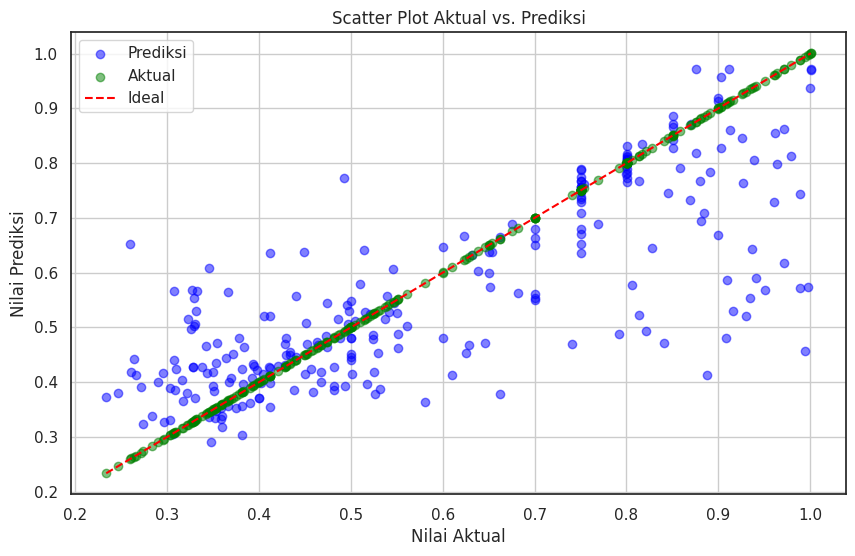

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

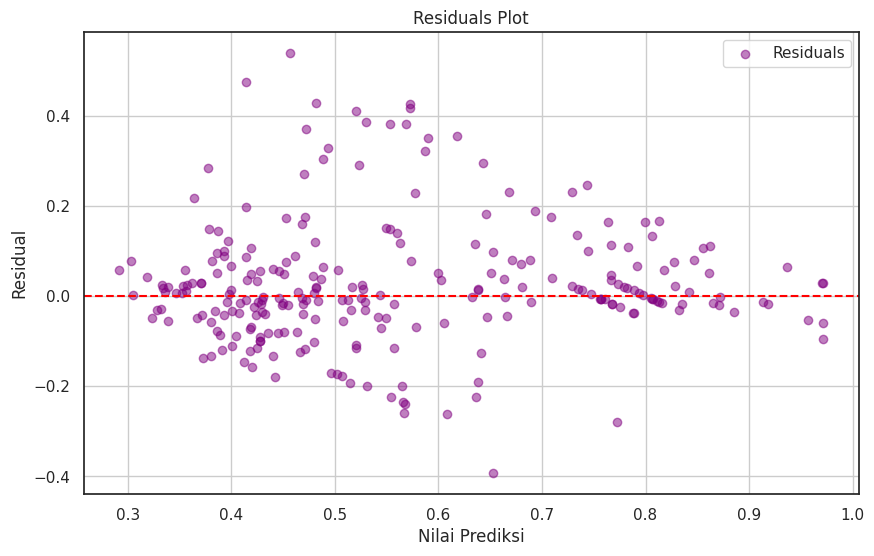

In [ ]:
regression_model_report_viz(y_test, y_tt_cat_best)

#### Random Forest

In [ ]:
rf_cv = RandomForestRegressor()

parameter_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [0, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_cv_rf = RandomizedSearchCV(rf_cv,
                                param_distributions=parameter_rf,
                                n_iter=50,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                verbose=0)

grid_cv_rf.fit(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [0, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cf4d7445960>},
                   scoring='neg_mean_squared_error')

In [ ]:
grid_cv_rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 164}

In [ ]:
grid_cv_rf.best_score_

-0.01707668686881441

In [ ]:
rf_best = RandomForestRegressor(max_depth=50,
                                max_features='sqrt',
                                min_samples_leaf=1,
                                min_samples_split=5,
                                n_estimators=191)

rf_best.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_split=5,
                      n_estimators=191)

In [ ]:
y_tt_rf_best = rf_best.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.0977
MSE: 0.0206
RMSE: 0.1434
sMAPE: 17.6437%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

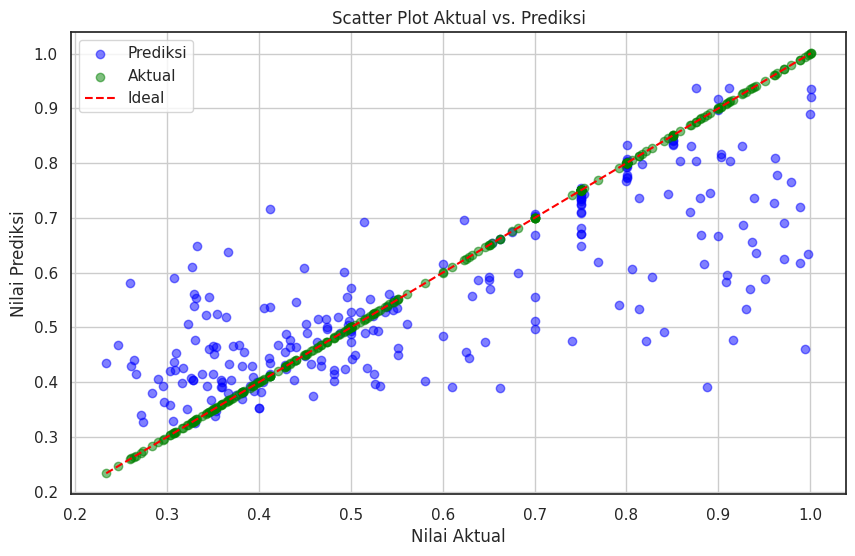

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

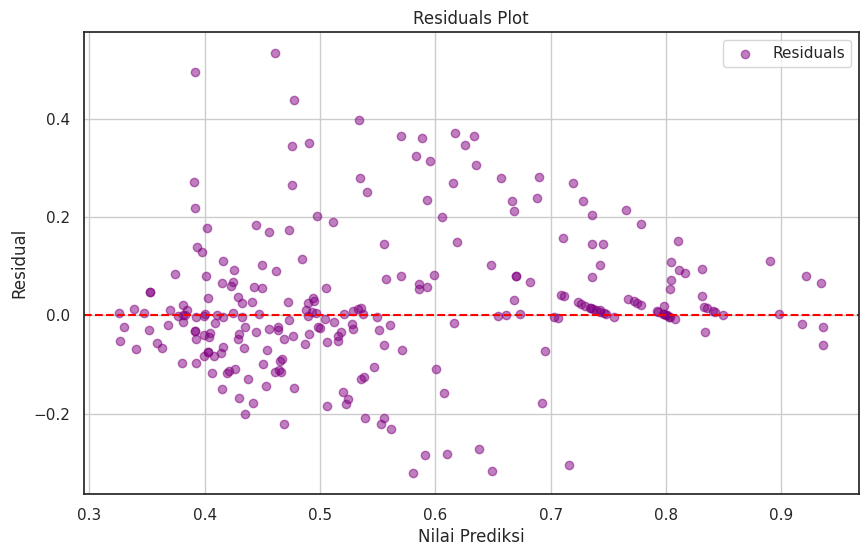

In [ ]:
regression_model_report_viz(y_test, y_tt_rf_best)

#### XGBoost

In [ ]:
xgb_cv = xgb.XGBRegressor()

parameter_xgb = {
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'colsample_bytree': np.linspace(0.3, 0.7, 5),
    'n_estimators': randint(50, 200)
}

grid_cv_xgb = RandomizedSearchCV(xgb_cv,
                                 param_distributions=parameter_xgb,
                                 n_iter=50,
                                 scoring='neg_mean_squared_error',
                                 cv=5,
                                 verbose=0)

grid_cv_xgb.fit(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
                                        'max_depth': [4, 6, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cf4d6692bc0>},
                   scoring='neg_mean_squared_error')

In [ ]:
grid_cv_xgb.best_params_

{'colsample_bytree': 0.39999999999999997,
 'gamma': 0,
 'learning_rate': 0.05999999999999999,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 163}

In [ ]:
# MSE Negatif
grid_cv_xgb.best_score_

-0.015768260197860366

In [ ]:
xgb_best = xgb.XGBRegressor(colsample_bytree=0.5,
                            gamma=0,
                            learning_rate=0.89,
                            max_depth=4,
                            min_child_weight=3,
                            n_estimators=191)

xgb_best.fit(X_train, y_train)

<IPython.core.display.Javascript object>

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.89, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=191, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_tt_xgb_best = xgb_best.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 0.1168
MSE: 0.0284
RMSE: 0.1685
sMAPE: 22.2079%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

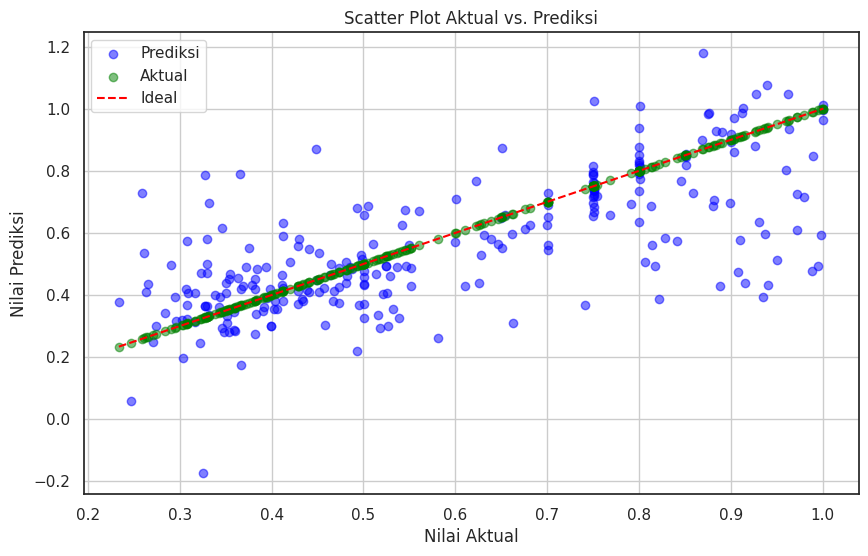

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

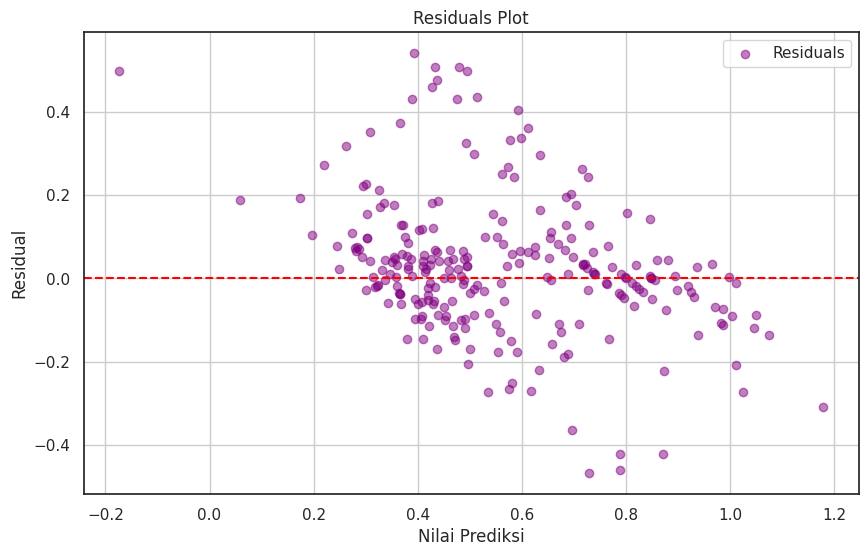

In [ ]:
regression_model_report_viz(y_test, y_tt_xgb_best)

#### Analisis Insight

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

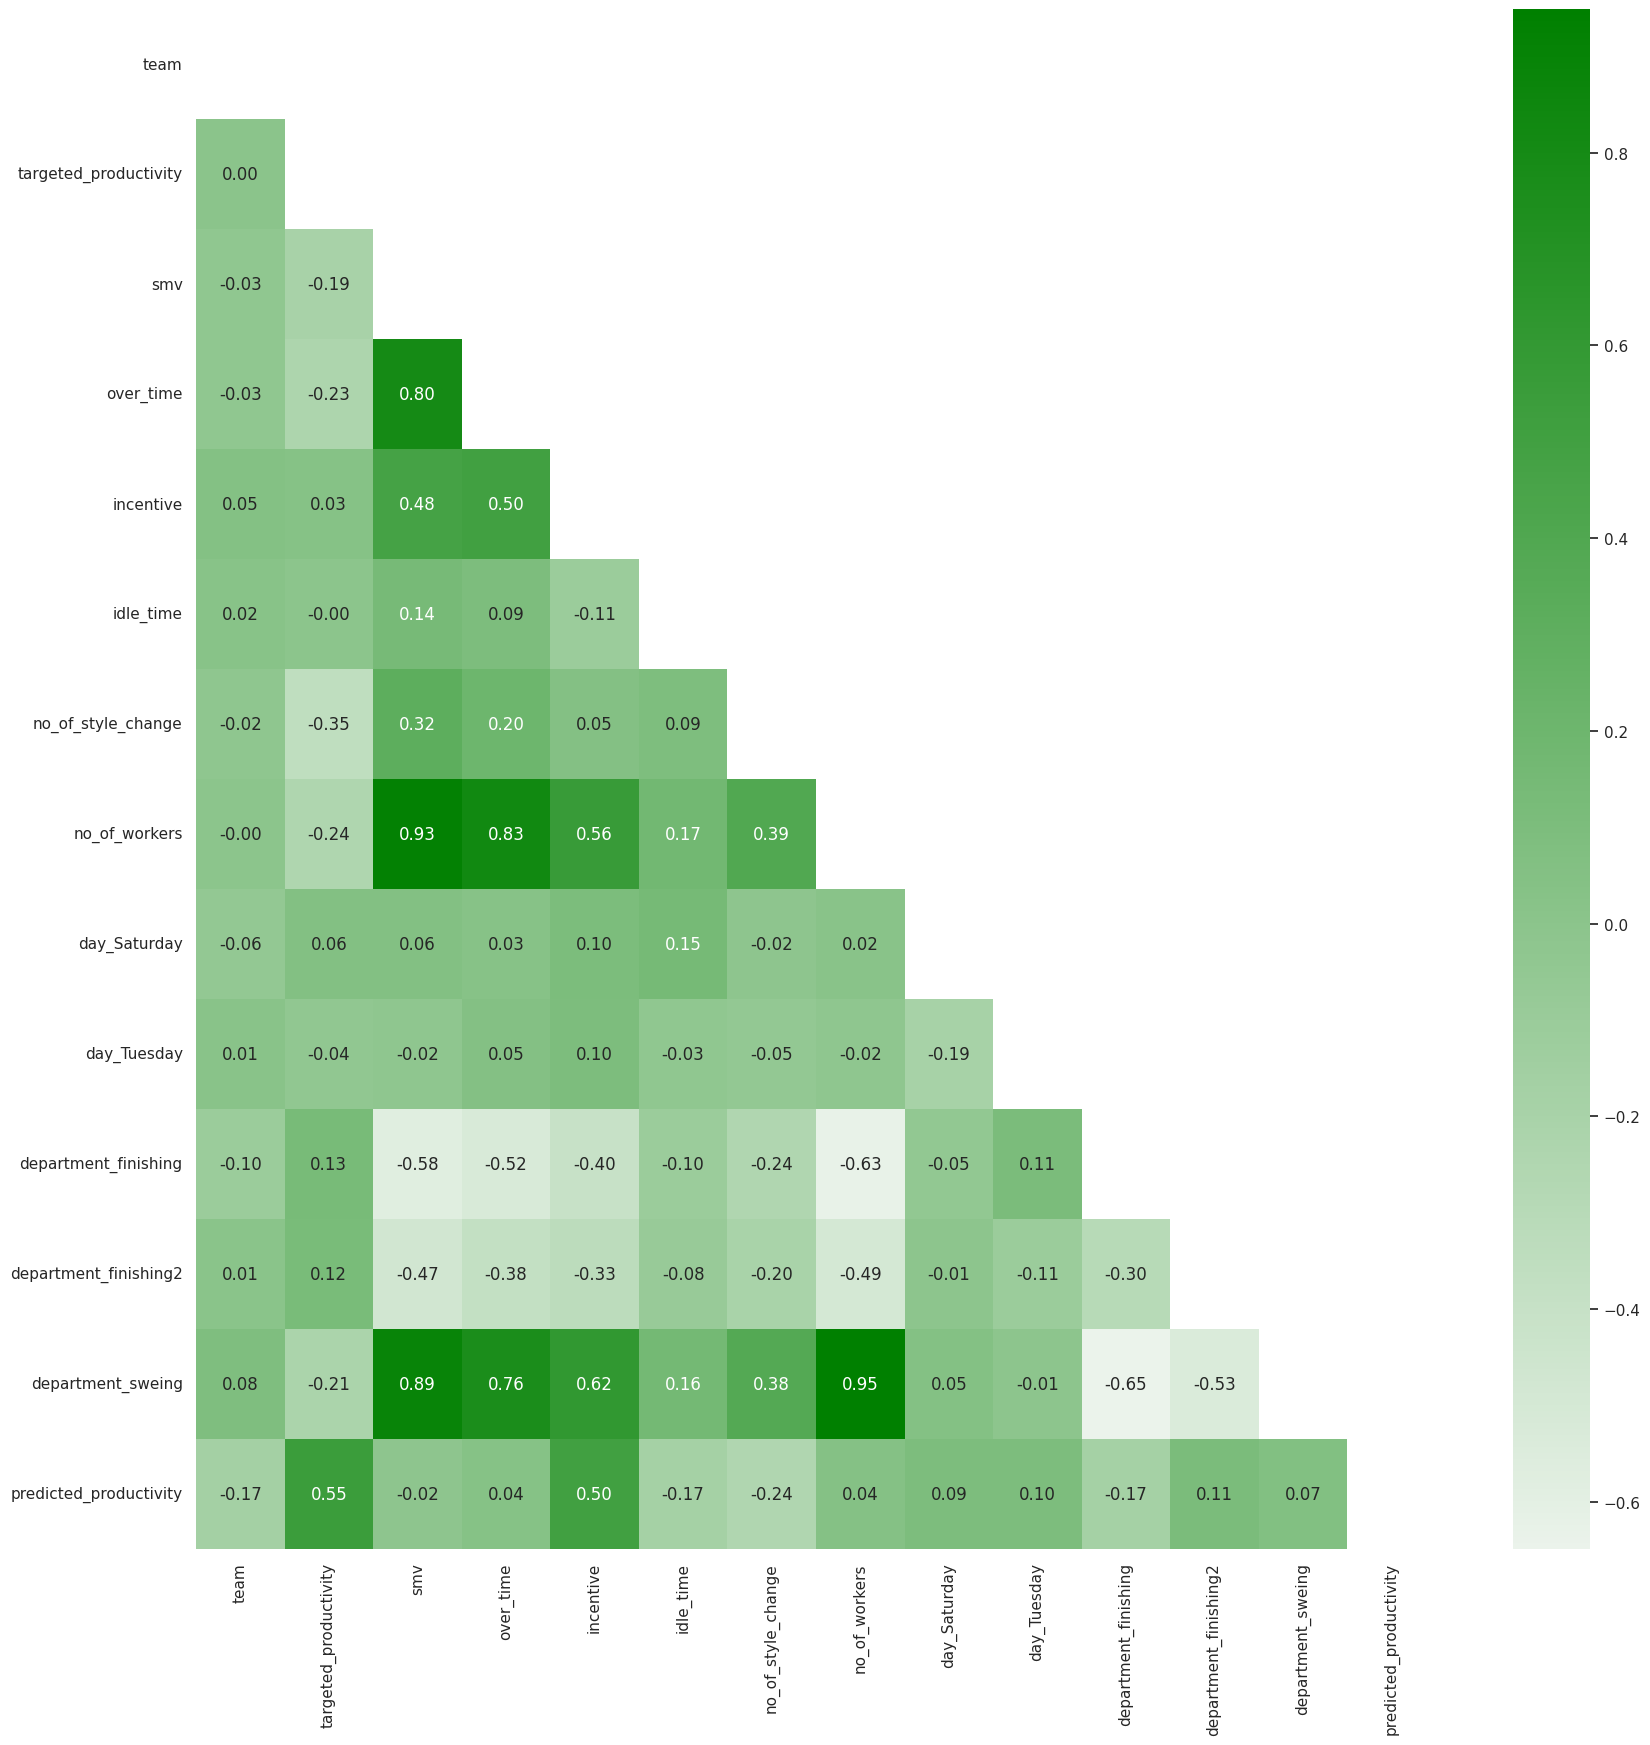

In [ ]:
X_test_with_predictions = X_test.copy()

# Tambahkan hasil prediksi sebagai kolom baru
X_test_with_predictions['predicted_productivity'] = y_tt_rf_best

# Membuat visualisasi korelasi
sns.set(font_scale=1)
plt.figure(figsize=(20, 20))
sns.set_style("white")
cmap = sns.light_palette("green", as_cmap=True)

# Hitung korelasi
corr = X_test_with_predictions.corr()

# Buat mask untuk segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

# Buat heatmap
sns.heatmap(corr, annot=True, cmap=cmap, fmt='.2f', mask=mask)

plt.show()

In [ ]:
def scatter_plot(df, numerik_vars, target_var):
    num = df[numerik_vars]
    n = len(num.columns)
    rows = n // 2 + n % 2
    cols = 2
    sns.set(font_scale=1)
    fig, ax = plt.subplots(rows, cols, figsize=(20, rows * 5))

    for i in range(rows):
        for j in range(cols):
            index = i * cols + j

            if index < n:
                col = num.columns[index]
                sns.scatterplot(ax=ax[i, j], data=df, x=col, y=target_var)

                ax[i, j].set_title(f'Hubungan antara {col} terhadap {target_var}', fontdict={'fontsize': 15})
                ax[i, j].set_xlabel(col)
                ax[i, j].set_ylabel(target_var)

    plt.tight_layout()
    plt.show()

# List of numerical variables
numerical_vars = X_test.columns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

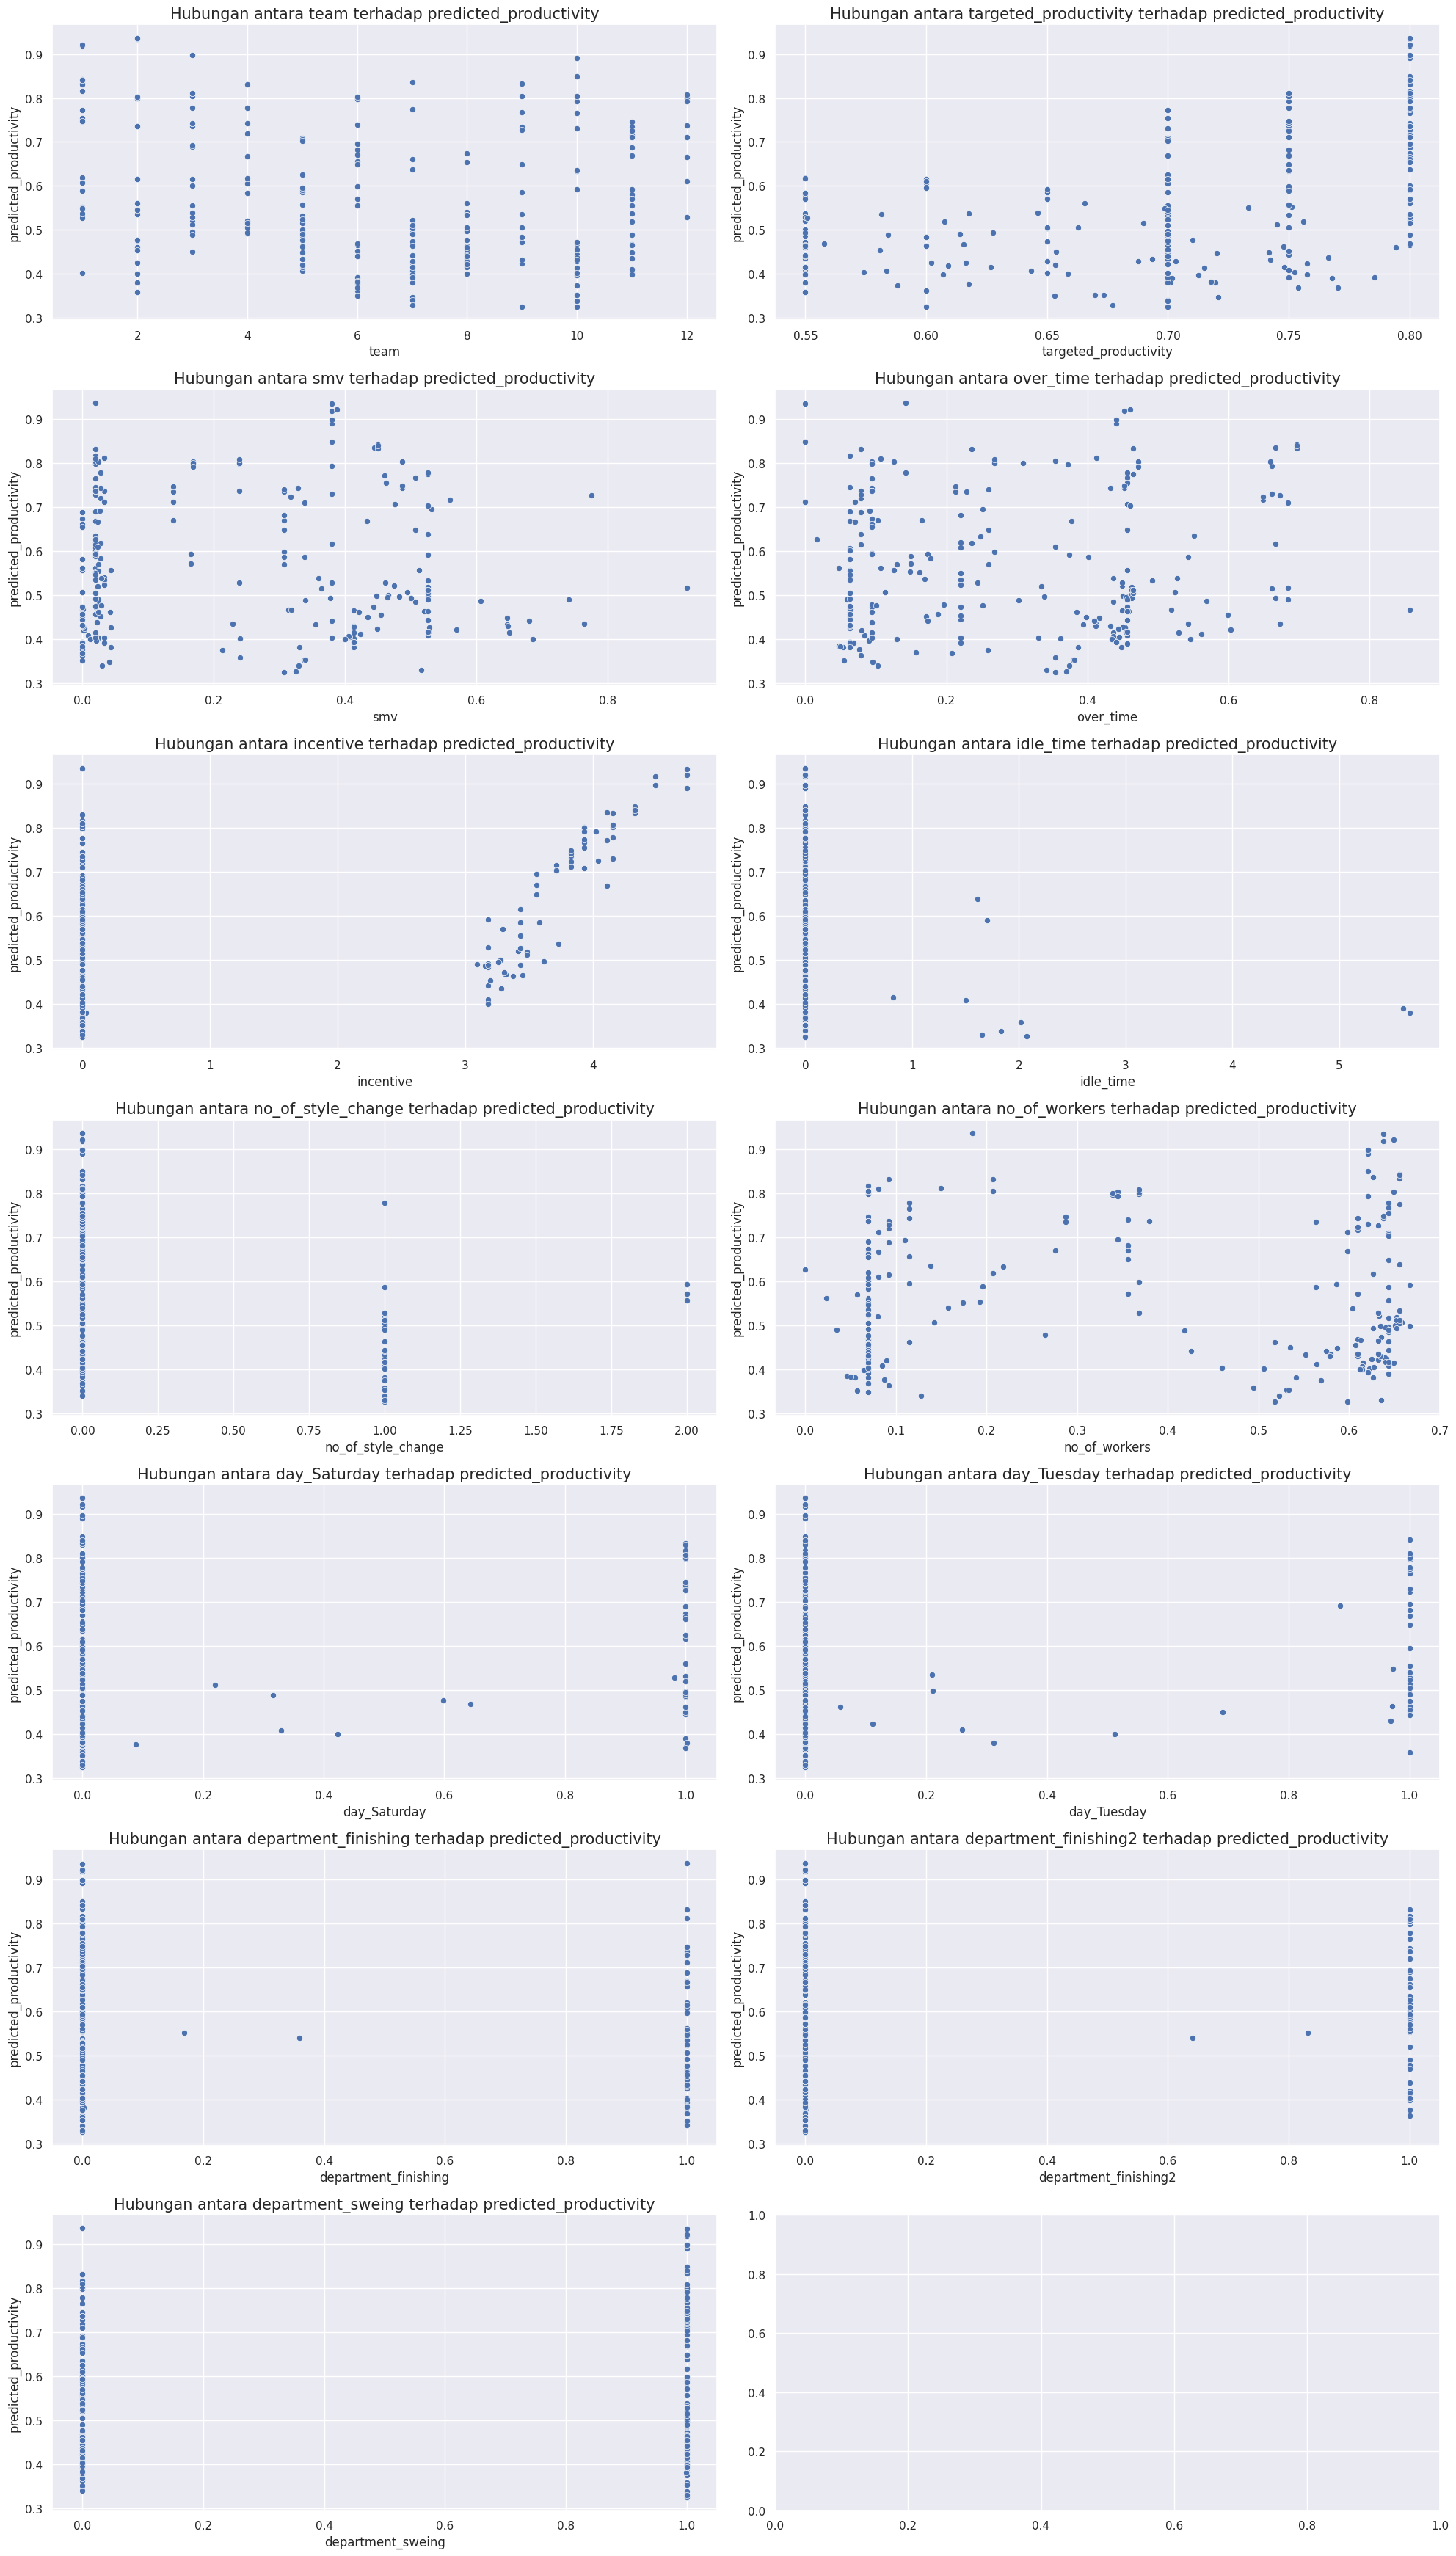

In [ ]:
scatter_plot(X_test_with_predictions, numerical_vars, 'predicted_productivity')

In [ ]:
categorical_vars = ['team', 'no_of_style_change', 'department_sweing', 'department_finishing']

# Definisikan fungsi untuk membuat bar plot
def bar_plot(df, kategorik_vars, target_var):
    cat = df[kategorik_vars]
    n = len(cat.columns)
    rows = n // 2 + n % 2
    cols = 2
    sns.set(style="whitegrid", font_scale=1)
    fig, ax = plt.subplots(rows, cols, figsize=(20, rows * 5))

    for i in range(rows):
        for j in range(cols):
            index = i * cols + j

            if index < n:
                col = cat.columns[index]
                order = df.groupby(col)[target_var].mean().sort_values().index  # rata-rata

                unique_values = df[col].nunique()
                palette = sns.color_palette("Blues", unique_values)

                sns.barplot(ax=ax[i, j],
                            data=df,
                            x=col,
                            y=target_var,
                            order=order,
                            palette=palette)

                ax[i, j].set_title(f'Hubungan antara {col} terhadap {target_var}', fontdict={'fontsize': 15})
                ax[i, j].set_xlabel(col)
                ax[i, j].set_ylabel(target_var)

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

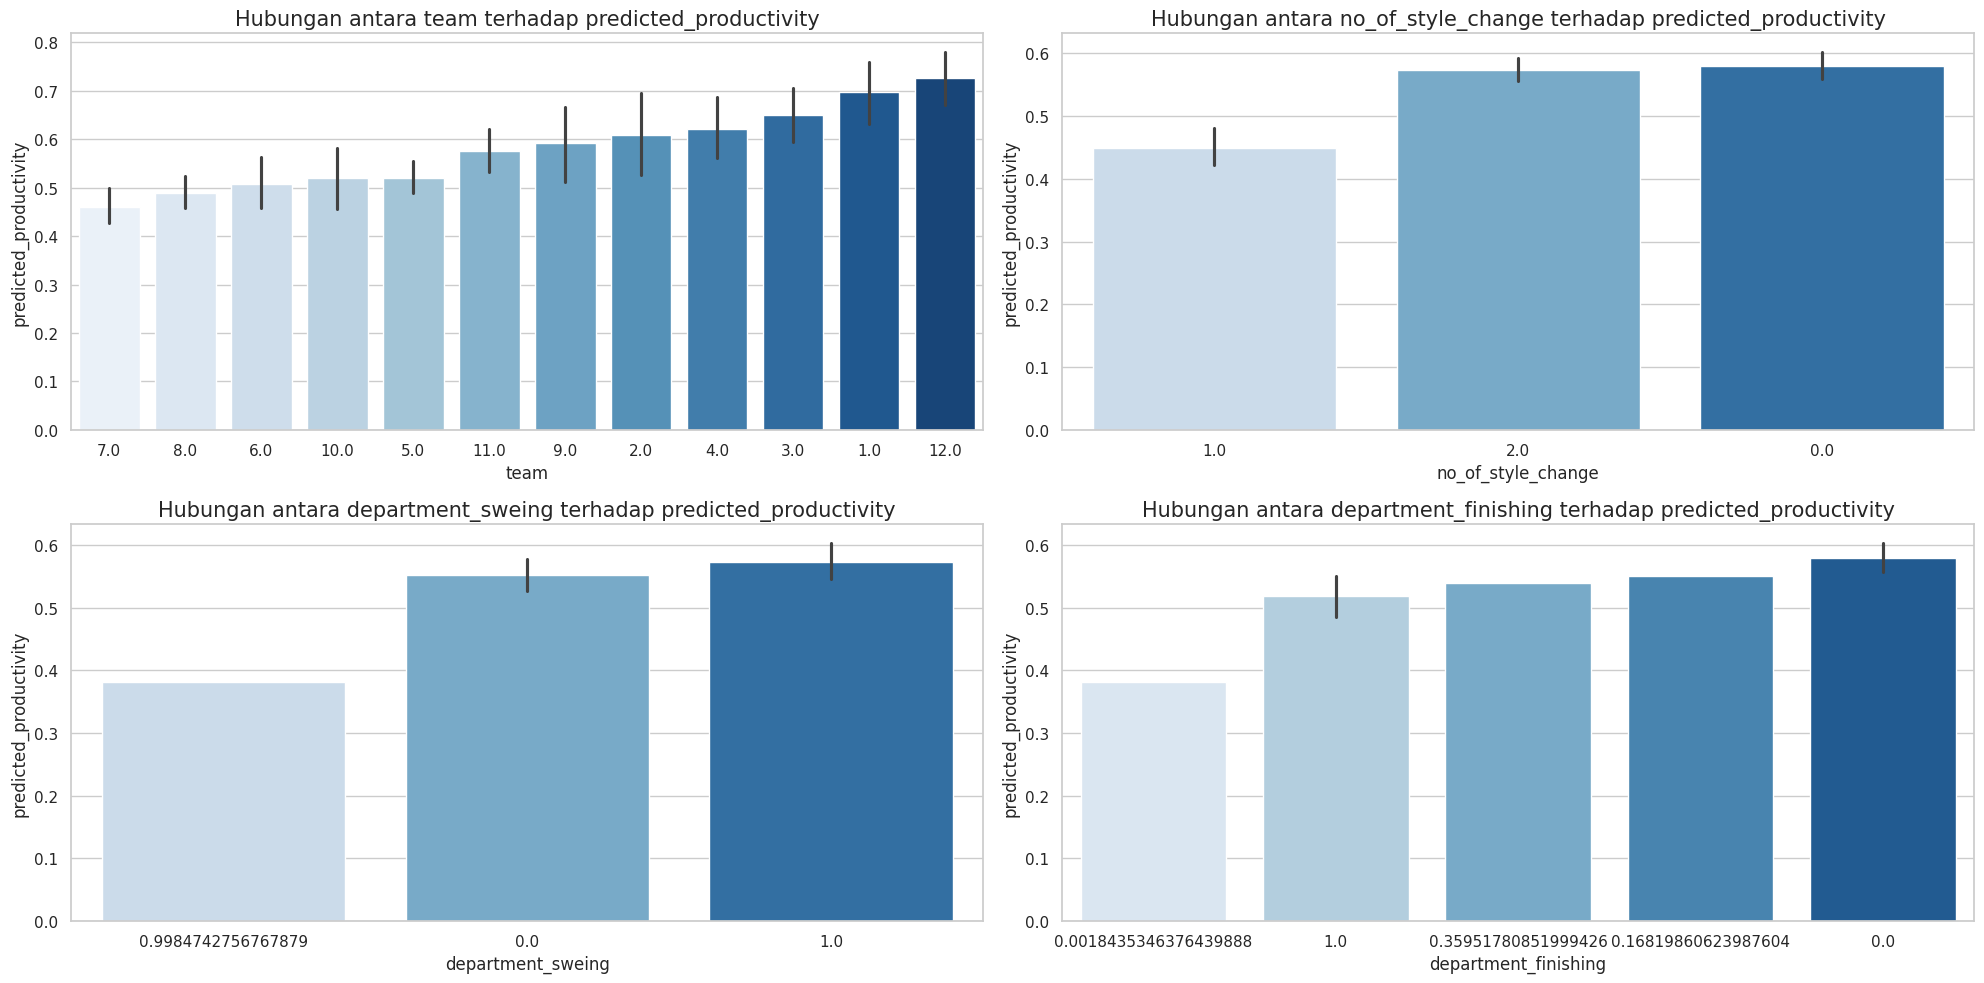

In [ ]:
bar_plot(X_test_with_predictions, categorical_vars, 'predicted_productivity')

In [ ]:
X_test_with_predictions['targeted_productivity'].describe()

count    253.000000
mean       0.704675
std        0.083387
min        0.550000
25%        0.650000
50%        0.700000
75%        0.794174
max        0.800000
Name: targeted_productivity, dtype: float64

In [ ]:
X_test_with_predictions['idle_time'].value_counts()

idle_time
0.000000    243
0.819786      1
1.704748      1
1.504077      1
2.073535      1
5.602119      1
5.658955      1
1.609438      1
2.014903      1
1.834213      1
1.650193      1
Name: count, dtype: int64

In [ ]:
X_test_with_predictions['idle_time'].describe()

count    253.000000
mean       0.096727
std        0.577068
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.658955
Name: idle_time, dtype: float64

In [ ]:
deskripsi_idle_time = X_test_with_predictions['idle_time'].describe()
rata_rata_idle_time = deskripsi_idle_time['mean']
rata_rata_y_tt_rf_best_idle_time_0 = np.mean(y_tt_rf_best[X_test_with_predictions['idle_time'] == 0])
print("Rata-rata y_tt_rf_best ketika idle_time = 0:", rata_rata_y_tt_rf_best_idle_time_0)


<IPython.core.display.Javascript object>

Rata-rata y_tt_rf_best ketika idle_time = 0: 0.568116438549294


In [ ]:
rata_rata_y_tt_rf_best_idle_time_not_0 = np.mean(y_tt_rf_best[X_test_with_predictions['idle_time'] != 0])
print("Rata-rata y_tt_rf_best ketika idle_time tidak sama dengan 0:", rata_rata_y_tt_rf_best_idle_time_not_0)


<IPython.core.display.Javascript object>

Rata-rata y_tt_rf_best ketika idle_time tidak sama dengan 0: 0.41775164115395613


### Kesimpulan Modelling
Model `Random Forest` setelah diterapkan Hyperparameter Tuning memiliki performa yang terbaik dalam memprediksi `actual_productivity` jika dibandingkan dengan model lainnya. Hal ini dibuktikan dengan nilai parameter evaluasi MAE, MSE, RMSE, dan SMAPE yang cukup rendah dan tidak menunjukkan adanya **overfitting** dan sedang dalam kondisi **good fit** sehingga menjadikan model Random Forest tersebut merupakan model terbaik.

### Kesimpulan Analisis

1. Tim karyawan yang memiliki target harian yang tinggi cenderung mencapai produktivitas yang lebih tinggi. Tim dengan target harian yang ditetapkan 10% lebih tinggi dari rata-rata (70%), berhasil mencapai target produktivitas yang bagus. Selain itu, jumlah revisi desain yang lebih rendah berkorelasi positif dengan produktivitas yang lebih tinggi. Data menunjukkan bahwa tim dengan perubahan desain minimal hanya memiliki produktivitas 10% lebih tinggi dibandingkan tim yang sering melakukan revisi.

2. Data menunjukkan bahwa produktivitas menurun dengan meningkatnya lembur. Tim yang bekerja lebih dari 0.6 mengalami penurunan produktivitas sebesar 20% dan akan terus menurun. Ini menunjukkan bahwa kelelahan dan kelebihan beban kerja mengurangi efisiensi buruh. Selain itu, tim yang menghabiskan waktu lebih dari 0.4 per hari pada satu tugas mengalami penurunan produktivitas sebesar 20%. Namun, Jumlah karyawan dalam tim yang optimal juga memainkan peran penting. Tim dengan jumlah pekerja yang sedang pekerja menunjukkan produktivitas yang stabil.

3. Insentif yang tinggi terbukti efektif dalam meningkatkan performa produktivitas tim. Tim yang menerima bonus kinerja menunjukkan peningkatan produktivitas yang signifikan. Selain itu, menjaga idle time tetap rendah juga krusial. Data menunjukkan bahwa tim karyawan dengan tanpa idle time memiliki produktivitas yang 26% lebih tinggi dibandingkan tim dengan idle time. Dengan mengurangi waktu tidak produktif, karyawan dapat fokus lebih baik pada tugas mereka.

In [ ]:
path2 = '/content/drive/MyDrive/Kode/ML/DBS-Expert/RandomForest_Productivity_4.pkl'

with open(path2, 'wb') as file:
    pickle.dump(rf_best, file)

<IPython.core.display.Javascript object>